In [1]:
#pip install kagglehub
#pip install ace-tools-open

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import ace_tools_open as tools
import numpy as np

### Extracting the dataset from Kaggle and save it locally 

In [3]:
# Extract latest version of cities housing market dataset from Kaggle 
path = kagglehub.dataset_download("vincentvaseghi/us-cities-housing-market-data")
# print the path to locate the file directory
print("Path to dataset files:", path)

Path to dataset files: /Users/catalinamalinowski/.cache/kagglehub/datasets/vincentvaseghi/us-cities-housing-market-data/versions/33


In [4]:
# Set the correct path to the directory
directory_path = "/Users/catalinamalinowski/.cache/kagglehub/datasets/vincentvaseghi/us-cities-housing-market-data/versions/33"

# check the files under the directory which the dataset is downloaded 
print("Files in the directory:", os.listdir(directory_path))

Files in the directory: ['city_market_tracker.tsv000']


In [5]:
# combine the directory path and the dataset file in to a single file path 
file_path = os.path.join(directory_path, 'city_market_tracker.tsv000')

# Open the TSV file using panda dataframe 
df = pd.read_csv(file_path, sep='\t')

# Display the first 5 rows of the dataset
df.head()

period_begin  period_end  period_duration region_type  region_type_id  \
0   2016-07-01  2016-07-31               30       place               6   
1   2014-01-01  2014-01-31               30       place               6   
2   2019-04-01  2019-04-30               30       place               6   
3   2017-04-01  2017-04-30               30       place               6   
4   2020-07-01  2020-07-31               30       place               6   

   table_id is_seasonally_adjusted                 region               city  \
0      9989                      f       Liberty Lake, WA       Liberty Lake   
1      5334                      f           Edgewood, WA           Edgewood   
2     26576                      f  White Meadow Lake, NJ  White Meadow Lake   
3      5544                      f          Englewood, NJ          Englewood   
4     21435                      f          Belvedere, SC          Belvedere   

            state  ... sold_above_list_yoy price_drops  price_drops_mom  \
0      Washington  ...            0.000000         NaN              NaN   
1      Washington  ...            0.714286    0.264706         0.204100   
2      New Jersey  ...           -0.100000    0.290323         0.118894   
3      New Jersey  ...            0.086957    0.165803        -0.035255   
4  South Carolina  ...            0.750000         NaN              NaN   

   price_drops_yoy  off_market_in_two_weeks  off_market_in_two_weeks_mom  \
0              NaN                 0.000000                     0.000000   
1         0.178992                 0.222222                     0.222222   
2         0.132428                 0.000000                     0.000000   
3        -0.034197                 0.138889                     0.069923   
4              NaN                 0.000000                     0.000000   

   off_market_in_two_weeks_yoy  parent_metro_region  \
0                     0.000000          Spokane, WA   
1                     0.055556           Tacoma, WA   
2                     0.000000           Newark, NJ   
3                     0.098889         New York, NY   
4                     0.000000          Augusta, GA   

   parent_metro_region_metro_code         last_updated  
0                           44060  2025-01-13 14:16:48  
1                           45104  2025-01-13 14:16:48  
2                           35084  2025-01-13 14:16:48  
3                           35614  2025-01-13 14:16:48  
4                           12260  2025-01-13 14:16:48  

[5 rows x 58 columns]

In [6]:
num_rows = len(df)
print(f"Number of Rows: {num_rows}")

Number of Rows: 5708042


### Transforming the data

In [7]:
# Extracting NC, Virginia, Texas data 
filtered_df = df[df['state'].isin(['North Carolina', 'Texas', 'Virginia'])]

# Display the first 5 rows of the filtered data
filtered_df.head(10)


period_begin  period_end  period_duration region_type  region_type_id  \
5     2024-04-01  2024-04-30               30       place               6   
12    2024-05-01  2024-05-31               30       place               6   
25    2024-07-01  2024-07-31               30       place               6   
47    2021-04-01  2021-04-30               30       place               6   
55    2013-04-01  2013-04-30               30       place               6   
58    2013-04-01  2013-04-30               30       place               6   
61    2016-06-01  2016-06-30               30       place               6   
83    2022-11-01  2022-11-30               30       place               6   
93    2017-01-01  2017-01-31               30       place               6   
105   2012-07-01  2012-07-31               30       place               6   

     table_id is_seasonally_adjusted                  region  \
5        8805                      f       Holiday Lakes, TX   
12      10173                      f         Krugerville, TX   
25        475                      f               Alice, TX   
47        475                      f               Alice, TX   
55       1855                      f             Bedford, TX   
58      18721                      f               Trent, TX   
61      25346                      f        Pimmit Hills, VA   
83      19395                      f             Watauga, TX   
93      19205                      f  Wrightsville Beach, NC   
105     23438                      f                Inez, TX   

                   city           state  ... sold_above_list_yoy price_drops  \
5         Holiday Lakes           Texas  ...                 NaN    0.333333   
12          Krugerville           Texas  ...            0.023810    0.066667   
25                Alice           Texas  ...           -0.051948    0.105263   
47                Alice           Texas  ...            0.333333         NaN   
55              Bedford           Texas  ...           -0.333333         NaN   
58                Trent           Texas  ...                 NaN         NaN   
61         Pimmit Hills        Virginia  ...            0.000000    0.357143   
83              Watauga           Texas  ...           -0.384921    0.393939   
93   Wrightsville Beach  North Carolina  ...                 NaN         NaN   
105                Inez           Texas  ...                 NaN         NaN   

     price_drops_mom  price_drops_yoy  off_market_in_two_weeks  \
5                NaN              NaN                 0.000000   
12         -0.155556        -0.361905                 0.500000   
25         -0.022396        -0.052632                 0.333333   
47               NaN              NaN                 0.312500   
55               NaN              NaN                 0.333333   
58               NaN              NaN                 0.000000   
61          0.090476         0.119048                 0.500000   
83         -0.223708         0.240093                 0.272727   
93               NaN              NaN                 0.000000   
105              NaN              NaN                 0.000000   

     off_market_in_two_weeks_mom  off_market_in_two_weeks_yoy  \
5                            NaN                          NaN   
12                      0.333333                     0.333333   
25                      0.333333                     0.102564   
47                     -0.072115                     0.312500   
55                     -0.238095                     0.333333   
58                      0.000000                          NaN   
61                      0.277778                     0.100000   
83                      0.009569                    -0.314229   
93                      0.000000                          NaN   
105                     0.000000                          NaN   

     parent_metro_region  parent_metro_region_metro_code         last_updated  
5            Houston, TX                       

In [8]:
#filtered_df.dtypes

In [9]:
# Extracting 2015 - 2025 data from period begin and period end columns
# convert the datatype to of columns that have dates to filter the dataset based on years
filtered_df['period_begin'] = pd.to_datetime(filtered_df['period_begin'], errors='coerce')
filtered_df['period_end'] = pd.to_datetime(filtered_df['period_end'], errors='coerce')

# Filter the data from 2020-2025
five_years_data = filtered_df[
    (filtered_df['period_begin'].dt.year >= 2020) & 
    (filtered_df['period_end'].dt.year <= 2025)
]

#Filter the data from 2015-2025
ten_years_data = filtered_df[
    (filtered_df['period_begin'].dt.year >= 2015) & 
    (filtered_df['period_end'].dt.year <= 2025)
]

print(five_years_data.tail())
print(ten_years_data.tail())

/var/folders/p7/44v4jhr91plb0p3405m1crv80000gn/T/ipykernel_16595/1133755310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period_begin'] = pd.to_datetime(filtered_df['period_begin'], errors='coerce')
/var/folders/p7/44v4jhr91plb0p3405m1crv80000gn/T/ipykernel_16595/1133755310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period_end'] = pd.to_datetime(filtered_df['period_end'], errors='coerce')


        period_begin period_end  period_duration region_type  region_type_id  \
5707967   2023-10-01 2023-10-31               30       place               6   
5707969   2024-04-01 2024-04-30               30       place               6   
5708033   2023-05-01 2023-05-31               30       place               6   
5708034   2024-04-01 2024-04-30               30       place               6   
5708039   2024-08-01 2024-08-31               30       place               6   

         table_id is_seasonally_adjusted                    region  \
5707967      2714                      f       Carolina Shores, NC   
5707969     23177                      f      Gloucester Point, VA   
5708033     13493                      f  North Richland Hills, TX   
5708034      9223                      f            Kure Beach, NC   
5708039     18307                      f            Weddington, NC   

                         city           state  ... sold_above_list_yoy  \
5707967       Carolina S

In [10]:
# check number of rows 
num_rows = len(five_years_data)
print(f"Number of Rows: {num_rows}")

Number of Rows: 238492


In [11]:
# Dropping columns that aren't essential for data analysis tbale
five_years_data = pd.DataFrame(five_years_data)
drop_columns = [
    'table_id',
    'is_seasonally_adjusted',
    'region_type',
    'region_type_id',
    'property_type',
    'region',
    'state_code',
    'last_updated',
    'period_duration'    
]
five_years_data = five_years_data.drop(columns=drop_columns)
print(five_years_data.head())

   period_begin period_end           city  state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes  Texas                -1   
12   2024-05-01 2024-05-31    Krugerville  Texas                -1   
25   2024-07-01 2024-07-31          Alice  Texas                -1   
47   2021-04-01 2021-04-30          Alice  Texas                -1   
83   2022-11-01 2022-11-30        Watauga  Texas                -1   

    median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
5             56000.0                    NaN                    NaN   
12           712000.0               0.514894               0.675373   
25           148000.0              -0.115494              -0.446729   
47           252000.0               1.913295               1.000000   
83           284000.0               0.006557               0.053803   

    median_list_price  median_list_price_mom  ...  sold_above_list_mom  \
5            119900.0                    NaN  ...                  NaN   
12  

In [12]:
print(len(five_years_data.columns))

49


In [13]:
# percentage of missing values in the data base:
missing_values = five_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000000
median_sale_price_mom             16.300337
median_sale_price_yoy             16.941029
median_list_price                 14.184124
median_list_price_mom             26.002130
median_list_price_yoy             27.222716
median_ppsf                        0.661657
median_ppsf_mom                   16.966607
median_ppsf_yoy                   17.646714
median_list_ppsf                  14.484763
median_list_ppsf_mom              26.357278
median_list_ppsf_yoy              27.635728
homes_sold                         0.000000
homes_sold_mom                    16.300337
homes_sold_yoy                    16.940191
pending_sales                     12.769820
pending_sales_mom                 25.508612
pending_sales_yoy               

In [14]:
five_years_data = five_years_data.drop(columns=["median_sale_price_mom", "median_list_price_mom", "median_ppsf_mom", "median_list_ppsf_mom", "homes_sold_mom",\
                      "pending_sales_mom", "new_listings_mom", "inventory_mom", "months_of_supply_mom", "median_dom_mom",\
                      "avg_sale_to_list_mom", "sold_above_list_mom", "price_drops_mom", "off_market_in_two_weeks_mom"])
five_years_data.head()

period_begin period_end           city  state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes  Texas                -1   
12   2024-05-01 2024-05-31    Krugerville  Texas                -1   
25   2024-07-01 2024-07-31          Alice  Texas                -1   
47   2021-04-01 2021-04-30          Alice  Texas                -1   
83   2022-11-01 2022-11-30        Watauga  Texas                -1   

    median_sale_price  median_sale_price_yoy  median_list_price  \
5             56000.0                    NaN           119900.0   
12           712000.0               0.675373           675000.0   
25           148000.0              -0.446729           165000.0   
47           252000.0               1.000000           149000.0   
83           284000.0               0.053803           299900.0   

    median_list_price_yoy  median_ppsf  ...  avg_sale_to_list  \
5                     NaN    58.577406  ...          0.861538   
12               0.250232   232.662252  ...          0.995242   
25              -0.056873   103.496503  ...          0.926397   
47               0.027586   106.554703  ...          0.985631   
83               0.204418   199.408470  ...          0.984357   

    avg_sale_to_list_yoy  sold_above_list  sold_above_list_yoy  price_drops  \
5                    NaN         0.000000                  NaN     0.333333   
12             -0.005388         0.166667             0.023810     0.066667   
25             -0.099491         0.090909            -0.051948     0.105263   
47              0.059018         0.333333             0.333333          NaN   
83             -0.043691         0.222222            -0.384921     0.393939   

    price_drops_yoy  off_market_in_two_weeks  off_market_in_two_weeks_yoy  \
5               NaN                 0.000000                          NaN   
12        -0.361905                 0.500000                     0.333333   
25        -0.052632                 0.333333                     0.102564   
47              NaN                 0.312500                     0.312500   
83         0.240093                 0.272727                    -0.314229   

    parent_metro_region  parent_metro_region_metro_code  
5           Houston, TX                           26420  
12           Dallas, TX                           19124  
25            Alice, TX                           10860  
47            Alice, TX                           10860  
83       Fort Worth, TX                           23104  

[5 rows x 35 columns]

In [15]:
# Removing unwanted columns looking at differences year-over-year (yoy)
five_years_data = five_years_data.drop(columns=["median_sale_price_yoy", "median_list_price_yoy", "median_ppsf_yoy", "median_list_ppsf_yoy", "homes_sold_yoy",\
                      "pending_sales_yoy", "new_listings_yoy", "inventory_yoy", "months_of_supply_yoy", "median_dom_yoy",\
                      "avg_sale_to_list_yoy", "sold_above_list_yoy", "price_drops_yoy", "off_market_in_two_weeks_yoy"])
five_years_data.head()

period_begin period_end           city  state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes  Texas                -1   
12   2024-05-01 2024-05-31    Krugerville  Texas                -1   
25   2024-07-01 2024-07-31          Alice  Texas                -1   
47   2021-04-01 2021-04-30          Alice  Texas                -1   
83   2022-11-01 2022-11-30        Watauga  Texas                -1   

    median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
5             56000.0           119900.0    58.577406        178.422619   
12           712000.0           675000.0   232.662252        246.702890   
25           148000.0           165000.0   103.496503        107.415902   
47           252000.0           149000.0   106.554703         79.824561   
83           284000.0           299900.0   199.408470        188.335358   

    homes_sold  ...  new_listings  inventory  months_of_supply  median_dom  \
5          1.0  ...           1.0        3.0               3.0       102.0   
12         6.0  ...          11.0       15.0               2.5        45.0   
25        11.0  ...          17.0       57.0               5.2        64.0   
47         6.0  ...          15.0       27.0               4.5       102.0   
83        18.0  ...          19.0       33.0               1.8        39.0   

    avg_sale_to_list  sold_above_list  price_drops  off_market_in_two_weeks  \
5           0.861538         0.000000     0.333333                 0.000000   
12          0.995242         0.166667     0.066667                 0.500000   
25          0.926397         0.090909     0.105263                 0.333333   
47          0.985631         0.333333          NaN                 0.312500   
83          0.984357         0.222222     0.393939                 0.272727   

    parent_metro_region parent_metro_region_metro_code  
5           Houston, TX                          26420  
12           Dallas, TX                          19124  
25            Alice, TX                          10860  
47            Alice, TX                          10860  
83       Fort Worth, TX                          23104  

[5 rows x 21 columns]

In [16]:
five_years_data.head(10)

period_begin period_end              city           state  \
5     2024-04-01 2024-04-30     Holiday Lakes           Texas   
12    2024-05-01 2024-05-31       Krugerville           Texas   
25    2024-07-01 2024-07-31             Alice           Texas   
47    2021-04-01 2021-04-30             Alice           Texas   
83    2022-11-01 2022-11-30           Watauga           Texas   
130   2024-07-01 2024-07-31  Boswell's Corner        Virginia   
133   2020-02-01 2020-02-29    Carolina Beach  North Carolina   
144   2021-06-01 2021-06-30         Sour Lake           Texas   
159   2024-01-01 2024-01-31     Winston-Salem  North Carolina   
171   2021-06-01 2021-06-30           Ladonia           Texas   

     property_type_id  median_sale_price  median_list_price  median_ppsf  \
5                  -1            56000.0           119900.0    58.577406   
12                 -1           712000.0           675000.0   232.662252   
25                 -1           148000.0           165000.0   103.496503   
47                 -1           252000.0           149000.0   106.554703   
83                 -1           284000.0           299900.0   199.408470   
130                -1           343500.0                NaN   171.848706   
133                 6           400000.0           392000.0   209.314495   
144                -1           110000.0           155950.0   107.581967   
159                 3           285000.0           249950.0   208.498024   
171                 6           170000.0                NaN    95.613048   

     median_list_ppsf  homes_sold  ...  new_listings  inventory  \
5          178.422619         1.0  ...           1.0        3.0   
12         246.702890         6.0  ...          11.0       15.0   
25         107.415902        11.0  ...          17.0       57.0   
47          79.824561         6.0  ...          15.0       27.0   
83         188.335358        18.0  ...          19.0       33.0   
130               NaN         2.0  ...           NaN        NaN   
133        280.095699         7.0  ...          12.0       54.0   
144         98.956086         3.0  ...          10.0       19.0   
159        159.820282        13.0  ...          14.0       30.0   
171               NaN         1.0  ...           NaN        1.0   

     months_of_supply  median_dom  avg_sale_to_list  sold_above_list  \
5                 3.0       102.0          0.861538         0.000000   
12                2.5        45.0          0.995242         0.166667   
25                5.2        64.0          0.926397         0.090909   
47                4.5       102.0          0.985631         0.333333   
83                1.8        39.0          0.984357         0.222222   
130               NaN        36.0          1.011111         0.500000   
133               7.7        81.0          0.954115         0.000000   
144               6.3        55.0               NaN         0.000000   
159               2.3        32.0          0.957714         0.153846   
171               1.0        18.0          0.944969         0.000000   

     price_drops  off_market_in_two_weeks  parent_metro_region  \
5       0.333333                 0.000000          Houston, TX   
12      0.066667                 0.500000           Dallas, TX   
25      0.105263                 0.333333            Alice, TX   
47           NaN                 0.312500            Alice, TX   
83      0.393939                 0.272727       Fort Worth, TX   
130          NaN                      NaN       Washington, DC   
133          NaN                 0.000000       Wilmington, NC   
144          NaN                 0.142857         Beaumont, TX   
159     0.233333                 0.352941    Winston-Salem, NC   
171          NaN                      NaN           Bonham, TX   

    parent_metro_region_metro_code  
5                            26420  
12                           19124  
25                           10860  
47                           10860  
83      

In [17]:
# percentage of missing values in the data base:
missing_values = five_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000000
median_list_price                 14.184124
median_ppsf                        0.661657
median_list_ppsf                  14.484763
homes_sold                         0.000000
pending_sales                     12.769820
new_listings                      14.175318
inventory                          6.983043
months_of_supply                   6.983043
median_dom                         0.788706
avg_sale_to_list                   7.642185
sold_above_list                    0.000000
price_drops                       37.665834
off_market_in_two_weeks            9.095064
parent_metro_region                0.000000
parent_metro_region_metro_code     0.000000
dtype: float64

In [18]:
# drop columns where more than 30% of values are missing 
threshold = 0.3
five_years_data = five_years_data.dropna(axis=1, thresh=len(five_years_data) * (1 - threshold))
print(five_years_data.shape)

(238492, 20)


In [19]:
five_years_data.head()

period_begin period_end           city  state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes  Texas                -1   
12   2024-05-01 2024-05-31    Krugerville  Texas                -1   
25   2024-07-01 2024-07-31          Alice  Texas                -1   
47   2021-04-01 2021-04-30          Alice  Texas                -1   
83   2022-11-01 2022-11-30        Watauga  Texas                -1   

    median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
5             56000.0           119900.0    58.577406        178.422619   
12           712000.0           675000.0   232.662252        246.702890   
25           148000.0           165000.0   103.496503        107.415902   
47           252000.0           149000.0   106.554703         79.824561   
83           284000.0           299900.0   199.408470        188.335358   

    homes_sold  pending_sales  new_listings  inventory  months_of_supply  \
5          1.0            1.0           1.0        3.0               3.0   
12         6.0            6.0          11.0       15.0               2.5   
25        11.0            9.0          17.0       57.0               5.2   
47         6.0           16.0          15.0       27.0               4.5   
83        18.0           22.0          19.0       33.0               1.8   

    median_dom  avg_sale_to_list  sold_above_list  off_market_in_two_weeks  \
5        102.0          0.861538         0.000000                 0.000000   
12        45.0          0.995242         0.166667                 0.500000   
25        64.0          0.926397         0.090909                 0.333333   
47       102.0          0.985631         0.333333                 0.312500   
83        39.0          0.984357         0.222222                 0.272727   

   parent_metro_region  parent_metro_region_metro_code  
5          Houston, TX                           26420  
12          Dallas, TX                           19124  
25           Alice, TX                           10860  
47           Alice, TX                           10860  
83      Fort Worth, TX                           23104

In [20]:
five_years_data.to_csv("five_years_data", index=False)

In [21]:
# Select relevant columns (adjust column names as needed)
price_column = 'median_sale_price'  # Adjust if necessary
region_column = 'parent_metro_region'  # Adjust if necessary

In [22]:
# Ensure we have the required columns
if price_column in five_years_data.columns and region_column in five_years_data.columns:
    # Calculate the price growth for each city
    price_growth = five_years_data.groupby(region_column)[price_column].agg(['first', 'last'])
    price_growth['growth_percent'] = ((price_growth['last'] - price_growth['first']) / price_growth['first']) * 100

    # Sort by highest growth
    fastest_growing_cities = price_growth.sort_values(by='growth_percent', ascending=False)
    # Display the top 10 fastest-growing cities
    print(fastest_growing_cities.head(10))
else:
    print("Error: Required columns not found in the dataset. Check column names.")

                        first       last  growth_percent
parent_metro_region                                     
New Bern, NC          27000.0   230000.0      751.851852
Corsicana, TX         28000.0   215000.0      667.857143
Odessa, TX            37000.0   269300.0      627.837838
Houston, TX           56000.0   380000.0      578.571429
Marion, NC           115000.0   460000.0      300.000000
Killeen, TX           70000.0   275000.0      292.857143
Granbury, TX         274900.0  1057500.0      284.685340
Charlotte, NC        277450.0   998750.0      259.974770
Henderson, NC         65000.0   210000.0      223.076923
Paris, TX            113500.0   360077.0      217.248458


In [23]:
# Select the top 10 fastest-growing cities
top_cities = fastest_growing_cities.head(10)

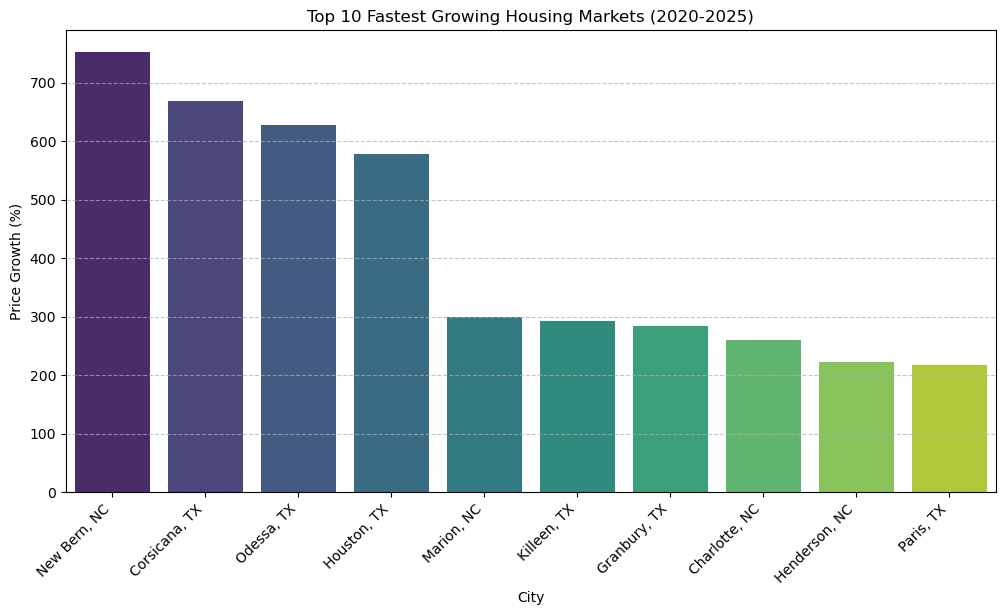

In [24]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_cities.index, 
    y=top_cities['growth_percent'], 
    palette="viridis"
)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Price Growth (%)")
plt.title("Top 10 Fastest Growing Housing Markets (2020-2025)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [25]:
# Extract year from period_begin
five_years_data['year'] = five_years_data['period_begin'].dt.year

/var/folders/p7/44v4jhr91plb0p3405m1crv80000gn/T/ipykernel_16595/2632363121.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped

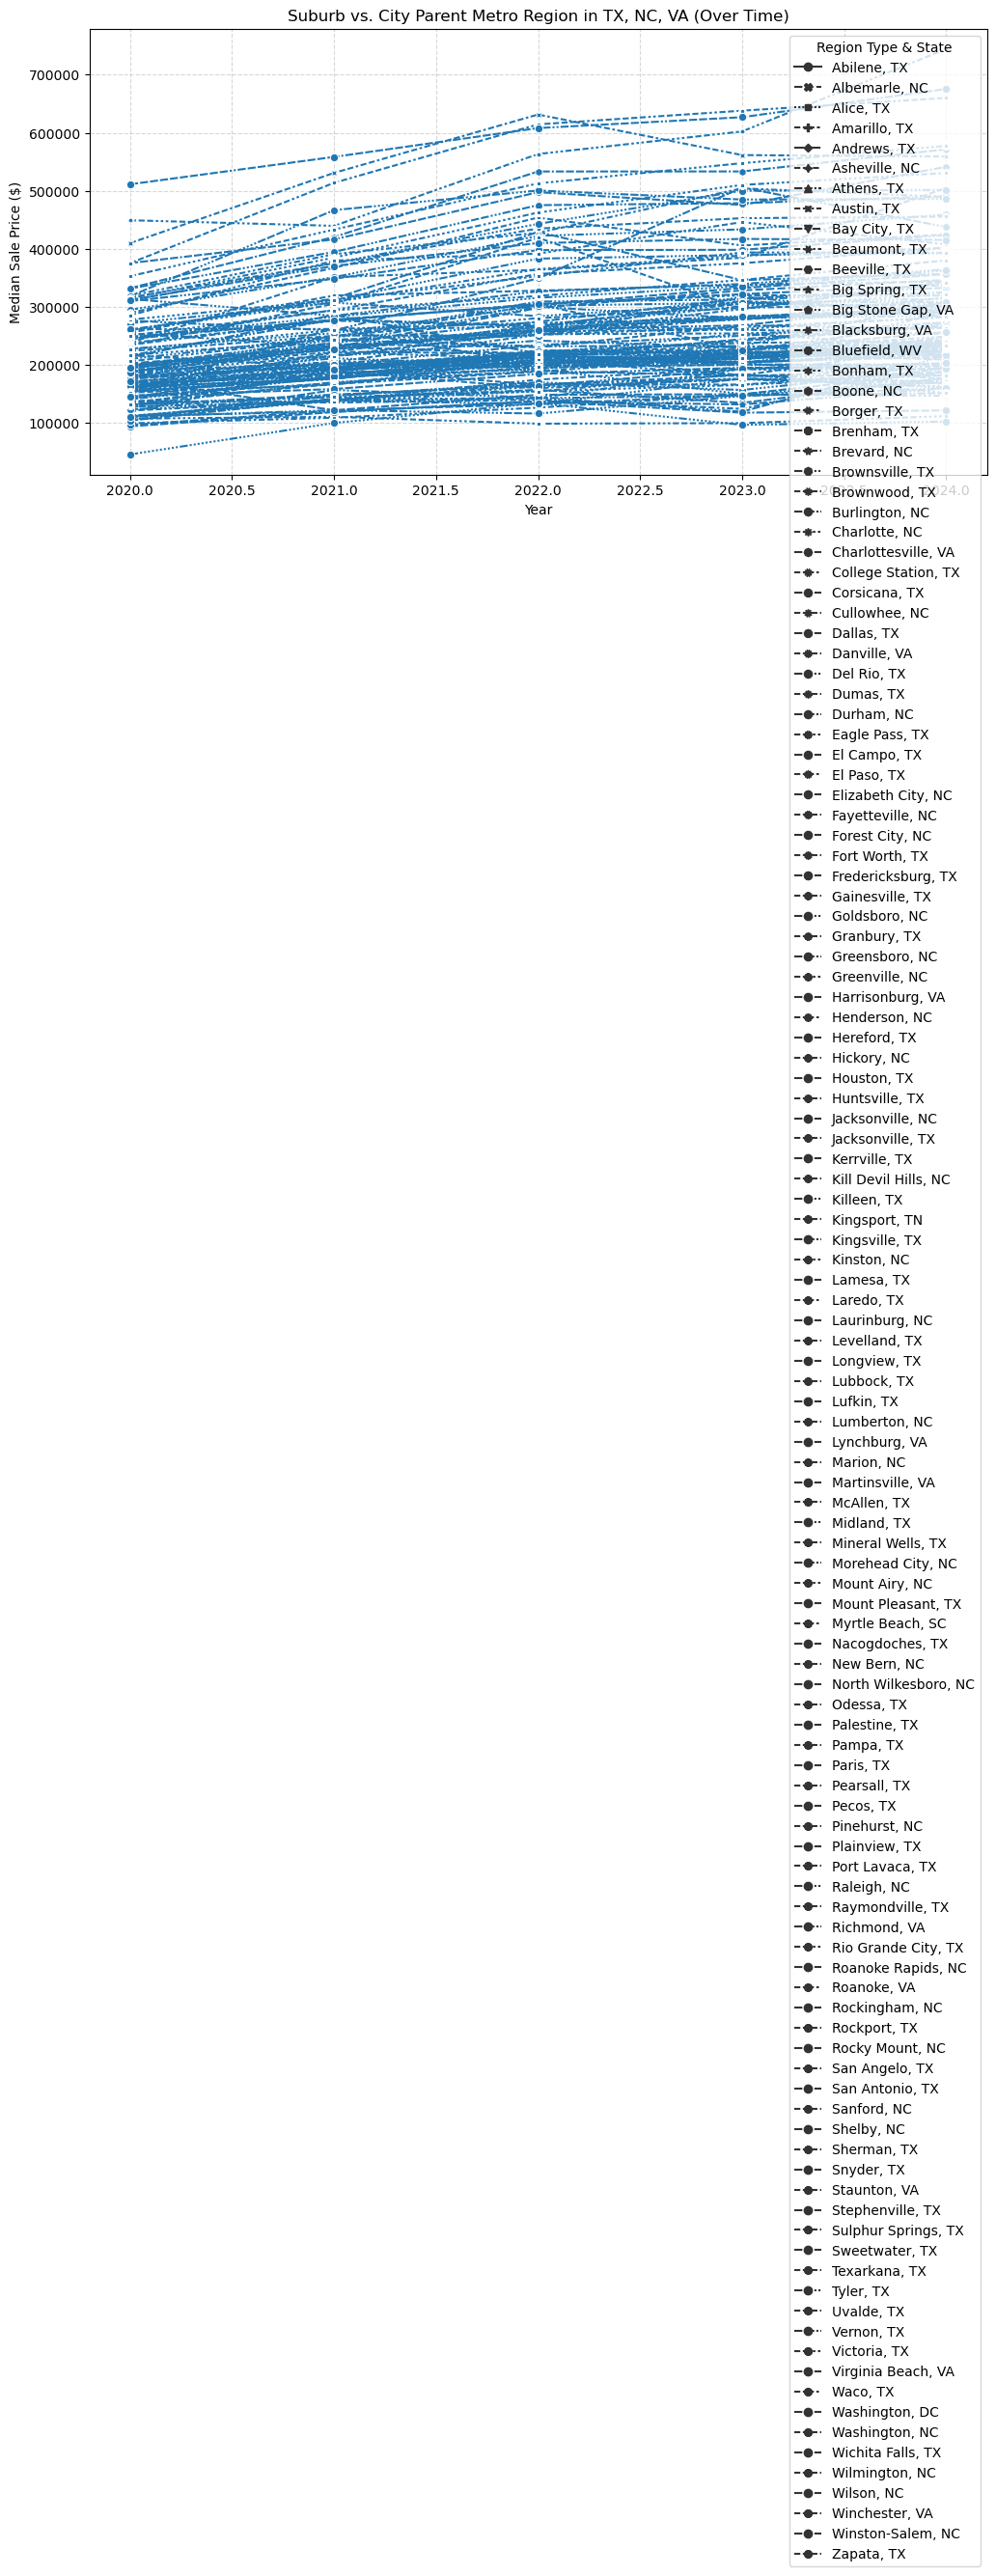

In [26]:
# Ensure we have region type column (e.g., 'region_type' or similar)
if 'parent_metro_region' in five_years_data.columns:
    # Filter for suburban areas and city parent metro regions
    df_filtered = five_years_data[five_years_data["state"].isin(["parent_metro_region"])]
    # Aggregate median sale price over time
    df_grouped = five_years_data.groupby(['year','parent_metro_region'])['median_sale_price'].mean().reset_index()

    # Plot the trends over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_grouped, 
        x='year', 
        y='median_sale_price',  
        style='parent_metro_region', 
        markers=True, 
        palette='coolwarm'
    )

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Median Sale Price ($)")
    plt.title("Suburb vs. City Parent Metro Region in TX, NC, VA (Over Time)")
    plt.legend(title="Region Type & State")
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

else:
    print("Error: column not found in the dataset. Check column names.")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

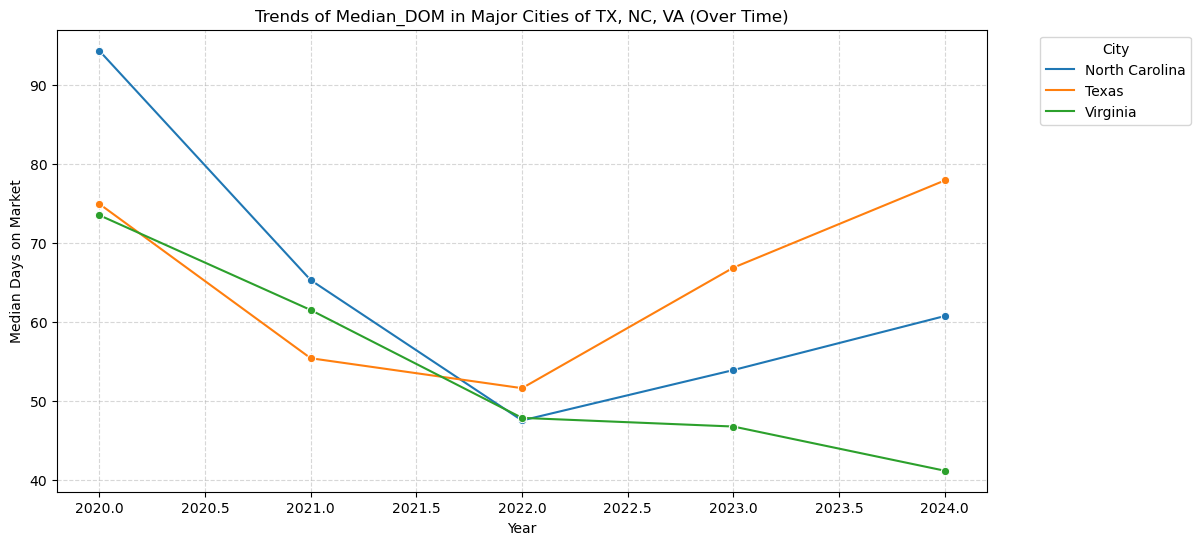

In [27]:
# Check if 'median_dom' and 'region_name' columns exist
if 'median_dom' in five_years_data.columns and 'state' in df_filtered.columns:
    
    # Group by year and city, then calculate average Median_DOM
    df_grouped = five_years_data.groupby(['year', 'state'])['median_dom'].mean().reset_index()

    # Select major cities (top 5 per state by lowest Median_DOM)
    major_cities = df_grouped.groupby('state')['median_dom'].mean().nsmallest(15).index
    df_major_cities = df_grouped[df_grouped['state'].isin(major_cities)]

    # Plot the trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_major_cities, 
        x='year', 
        y='median_dom', 
        hue='state', 
        marker='o', 
        palette='tab10'
    )

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Median Days on Market")
    plt.title("Trends of Median_DOM in Major Cities of TX, NC, VA (Over Time)")
    plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

else:
    print("Error: 'median_dom' or 'region_name' column not found in the dataset. Check column names.")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

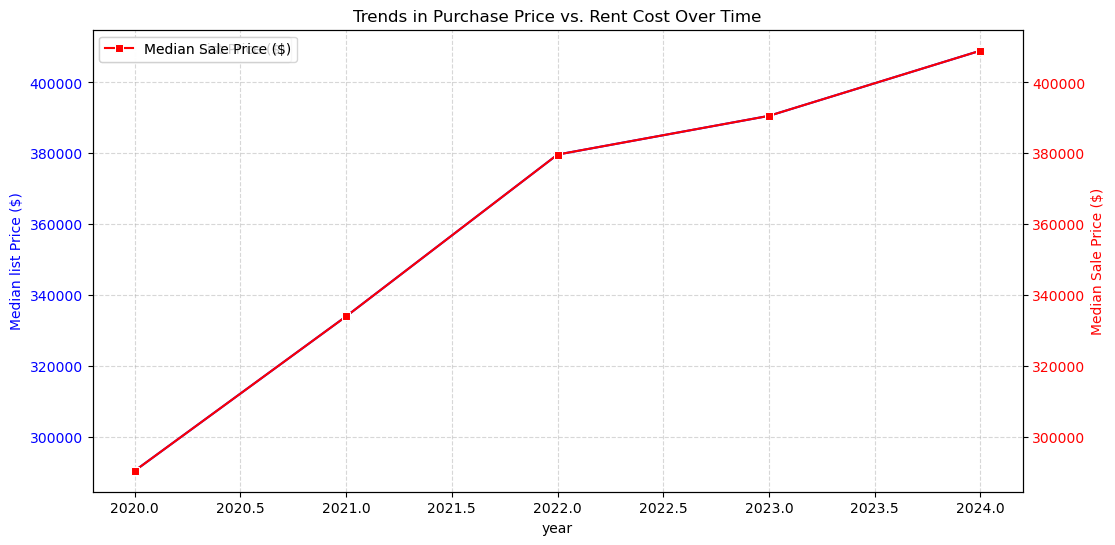

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


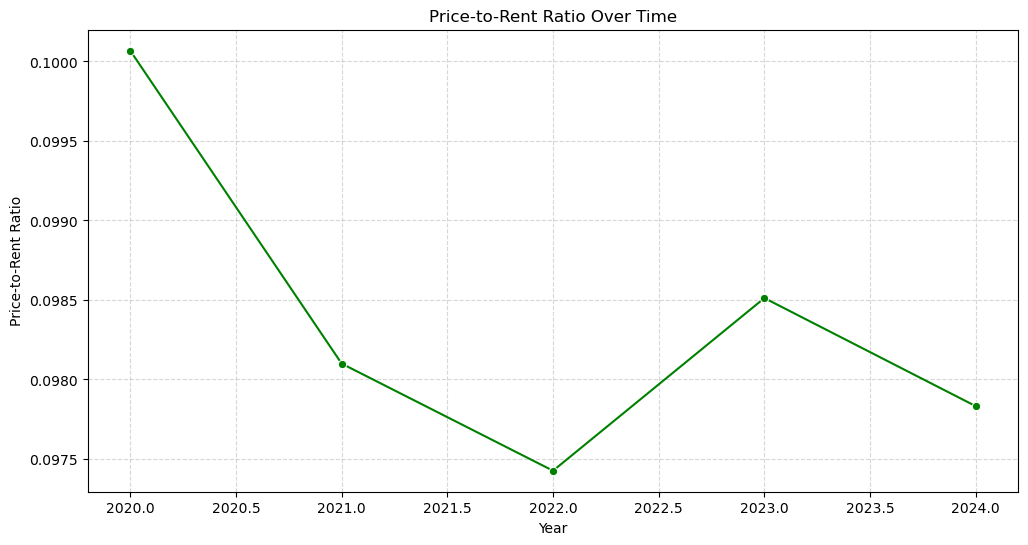

In [28]:
# Question 6 attempt
# Ensure necessary columns exist
if 'median_list_price' in five_years_data.columns and 'median_sale_price' in five_years_data.columns:
    
    # Calculate Price-to-Rent Ratio (higher values suggest it's better to rent, lower suggests better to buy)
    five_years_data['price_to_rent_ratio'] = five_years_data['median_list_price'] / (five_years_data['median_sale_price'] * 12)

    # Group by year and compute the average Price-to-Rent Ratio
    df_grouped = five_years_data.groupby('year')[['median_sale_price', 'price_to_rent_ratio']].mean().reset_index()

    # Create a dual-axis plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Median Sale Price
    sns.lineplot(data=df_grouped, x='year', y='median_sale_price', marker='o', ax=ax1, color='blue', label="Median List Price ($)")
    ax1.set_ylabel("Median list Price ($)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Create a second y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=df_grouped, x='year', y='median_sale_price', marker='s', ax=ax2, color='red', label="Median Sale Price ($)")
    ax2.set_ylabel("Median Sale Price ($)", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Titles and grid
    plt.title("Trends in Purchase Price vs. Rent Cost Over Time")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

    # Display Price-to-Rent Ratio trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped, x='year', y='price_to_rent_ratio', marker='o', color='green')

    plt.xlabel("Year")
    plt.ylabel("Price-to-Rent Ratio")
    plt.title("Price-to-Rent Ratio Over Time")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

else:
    print("Error: Required columns ('median_sale_price' or 'median_rent_price') not found in the dataset. Check column names.")

/var/folders/p7/44v4jhr91plb0p3405m1crv80000gn/T/ipykernel_16595/1436320038.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price_to_rent_ratio'] = five_years_data['median_list_price'] / (five_years_data['median_sale_price'] * 12)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

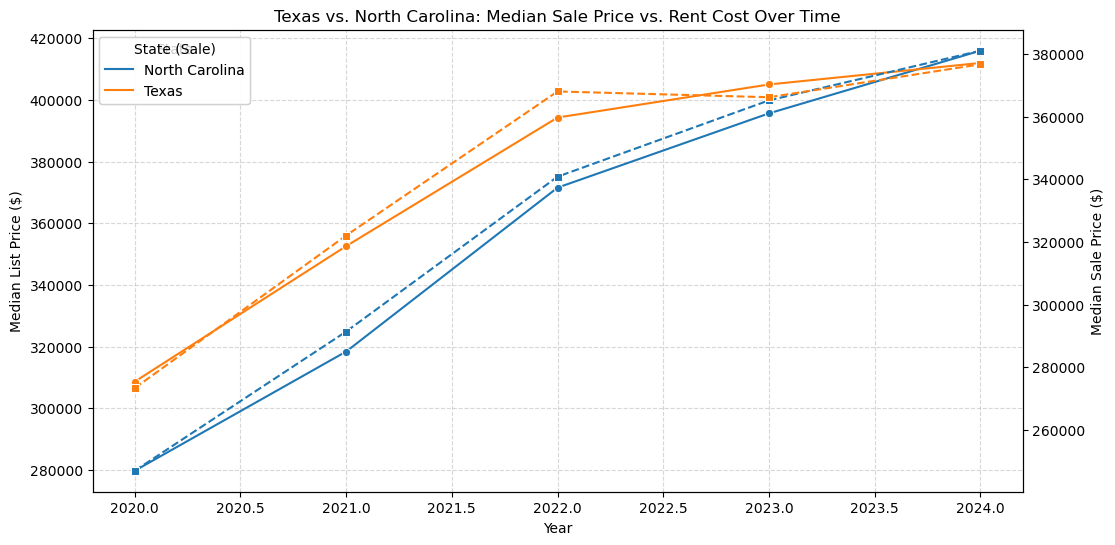

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

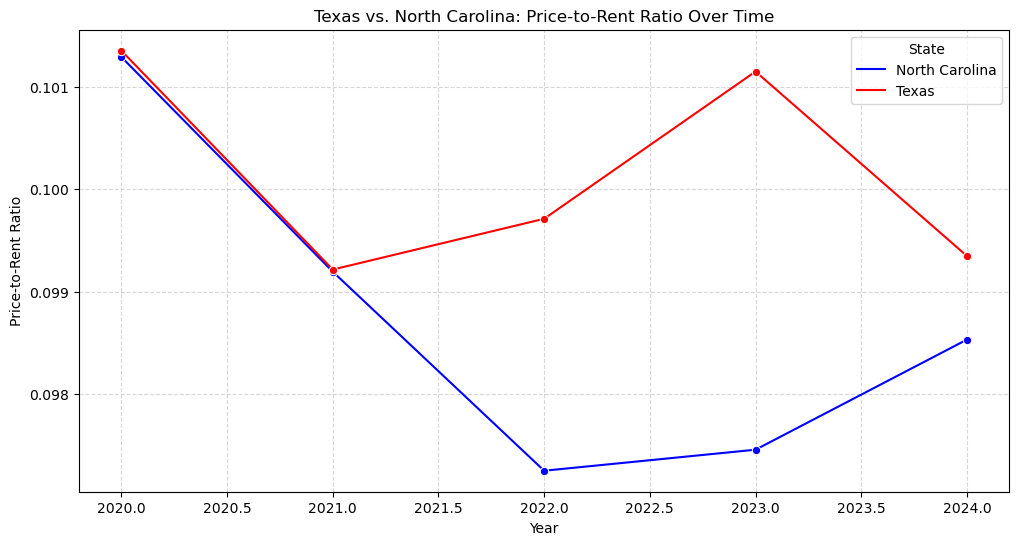

In [29]:
#attempting 6, second half of the question
# Filter for North Carolina (NC) and Texas (TX)
df_filtered = five_years_data[five_years_data['state'].isin(["North Carolina", "Texas"])]

# Ensure necessary columns exist
if 'median_sale_price' in five_years_data.columns and 'median_list_price' in five_years_data.columns:
    
    # Calculate Price-to-Rent Ratio
    df_filtered['price_to_rent_ratio'] = five_years_data['median_list_price'] / (five_years_data['median_sale_price'] * 12)

    # Group by year and state
    df_grouped = df_filtered.groupby(['year', 'state'])[['median_list_price', 'median_sale_price', 'price_to_rent_ratio']].mean().reset_index()

    # Create a dual-axis plot for purchase vs. rent price
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Median Sale Price
    sns.lineplot(data=df_grouped, x='year', y='median_list_price', hue='state', marker='o', ax=ax1)
    ax1.set_ylabel("Median List Price ($)")
    ax1.set_xlabel("Year")
    ax1.set_title("Texas vs. North Carolina: Median Sale Price vs. Rent Cost Over Time")
    ax1.legend(title="State")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Create a second y-axis for median rent price
    ax2 = ax1.twinx()
    sns.lineplot(data=df_grouped, x='year', y='median_sale_price', hue='state', marker='s', ax=ax2, linestyle="dashed")
    ax2.set_ylabel("Median Sale Price ($)")
    ax2.legend(title="State (Sale)", loc="upper left")

    plt.show()

    # Plot the Price-to-Rent Ratio trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped, x='year', y='price_to_rent_ratio', hue='state', marker='o', palette=['blue', 'red'])

    plt.xlabel("Year")
    plt.ylabel("Price-to-Rent Ratio")
    plt.title("Texas vs. North Carolina: Price-to-Rent Ratio Over Time")
    plt.legend(title="State")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

else:
    print("Error: Required columns ('median_list_price' or 'median_sale_price') not found in the dataset. Check column names.")

In [30]:
#Deep copy of five_years_data dataframe for next phase of analysis
housing_data = five_years_data.copy(deep=True)

In [31]:
# SOURCE: https://simplemaps.com/data/us-cities 
cities_population = pd.read_csv("uscities.csv")

# filter North Carolina, Virginia and Texas 
cities_population = cities_population[cities_population['state_name'].isin(['North Carolina', 'Texas', 'Virginia'])]
# Fetch only city, state_name and population columns 
cities_population = cities_population[['city', 'population', 'state_name']]
cities_population.head()

city  population      state_name
4       Houston     6046392           Texas
5        Dallas     5843632           Texas
25  San Antonio     2069843           Texas
27       Austin     1915031           Texas
39    Charlotte     1436613  North Carolina

In [32]:
# merge the populaiton dataframe into the housing data (adding US cities cesnus data to the housing data file)
housing_data = pd.merge(housing_data, cities_population, how='left', left_on=['city', 'state'], right_on=['city', 'state_name'])
housing_data = housing_data.drop(columns=['state_name'])

housing_data.head()

period_begin period_end           city  state  property_type_id  \
0   2024-04-01 2024-04-30  Holiday Lakes  Texas                -1   
1   2024-05-01 2024-05-31    Krugerville  Texas                -1   
2   2024-07-01 2024-07-31          Alice  Texas                -1   
3   2021-04-01 2021-04-30          Alice  Texas                -1   
4   2022-11-01 2022-11-30        Watauga  Texas                -1   

   median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
0            56000.0           119900.0    58.577406        178.422619   
1           712000.0           675000.0   232.662252        246.702890   
2           148000.0           165000.0   103.496503        107.415902   
3           252000.0           149000.0   106.554703         79.824561   
4           284000.0           299900.0   199.408470        188.335358   

   homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
0         1.0  ...               3.0       102.0          0.861538   
1         6.0  ...               2.5        45.0          0.995242   
2        11.0  ...               5.2        64.0          0.926397   
3         6.0  ...               4.5       102.0          0.985631   
4        18.0  ...               1.8        39.0          0.984357   

   sold_above_list  off_market_in_two_weeks  parent_metro_region  \
0         0.000000                 0.000000          Houston, TX   
1         0.166667                 0.500000           Dallas, TX   
2         0.090909                 0.333333            Alice, TX   
3         0.333333                 0.312500            Alice, TX   
4         0.222222                 0.272727       Fort Worth, TX   

   parent_metro_region_metro_code  year price_to_rent_ratio  population  
0                           26420  2024            0.178423       853.0  
1                           19124  2024            0.079003      1929.0  
2                           10860  2024            0.092905     17797.0  
3                           10860  2021            0.049272     17797.0  
4                           23104  2022            0.087999     23336.0  

[5 rows x 23 columns]

In [33]:
# filter Texas data based on cities population size in descending order to know the largest city based on population size 
texas_data = housing_data[housing_data['state']=='Texas']
texas_data = texas_data.sort_values(by='population', ascending=False)
texas_data.to_csv("texas_data.csv", index=False)
texas_data.head(1)

period_begin period_end     city  state  property_type_id  \
181246   2024-07-01 2024-07-31  Houston  Texas                 3   

        median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
181246           159000.0           340000.0   150.397082        181.523283   

        homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
181246       170.0  ...               6.3        57.0          0.954549   

        sold_above_list  off_market_in_two_weeks  parent_metro_region  \
181246         0.052941                 0.124324          Houston, TX   

        parent_metro_region_metro_code  year price_to_rent_ratio  population  
181246                           26420  2024            0.178197   6046392.0  

[1 rows x 23 columns]

In [34]:
# Filter Houston TX data (largest population)
houston_TX = texas_data[texas_data['city']=='Houston']
houston_TX.to_csv("houston_TX_data.csv", index=False)
houston_TX.head(1)

period_begin period_end     city  state  property_type_id  \
181246   2024-07-01 2024-07-31  Houston  Texas                 3   

        median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
181246           159000.0           340000.0   150.397082        181.523283   

        homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
181246       170.0  ...               6.3        57.0          0.954549   

        sold_above_list  off_market_in_two_weeks  parent_metro_region  \
181246         0.052941                 0.124324          Houston, TX   

        parent_metro_region_metro_code  year price_to_rent_ratio  population  
181246                           26420  2024            0.178197   6046392.0  

[1 rows x 23 columns]

In [35]:
print(f"number of rows for Huston data is: {len(houston_TX)}")

number of rows for Huston data is: 300


In [36]:
# Filter the North Carlolina cities population in descending order
NC_data = housing_data[housing_data['state']=='North Carolina']
NC_data = NC_data.sort_values(by='population', ascending=False)
NC_data.to_csv("NC_data.csv", index=False)
NC_data.head()

period_begin period_end       city           state  property_type_id  \
218957   2024-12-01 2024-12-31  Charlotte  North Carolina                13   
237945   2023-02-01 2023-02-28  Charlotte  North Carolina                 4   
76811    2024-07-01 2024-07-31  Charlotte  North Carolina                13   
209000   2021-03-01 2021-03-31  Charlotte  North Carolina                13   
47730    2024-03-01 2024-03-31  Charlotte  North Carolina                 3   

        median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
218957           389820.0           395000.0   228.108644        230.832646   
237945           560000.0           399900.0   286.298569        225.218023   
76811            405000.0           400000.0   237.651187        240.014793   
209000           304500.0           330000.0   169.445628        189.646064   
47730            335500.0           420000.0   330.619974        246.101937   

        homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
218957       174.0  ...               3.2        52.0          0.983007   
237945         3.0  ...               3.3        18.0          1.023028   
76811        204.0  ...               3.0        39.0          0.989842   
209000       272.0  ...               1.9        35.0          1.010810   
47730        136.0  ...               2.2        34.0          0.986313   

        sold_above_list  off_market_in_two_weeks  parent_metro_region  \
218957         0.126437                 0.200000        Charlotte, NC   
237945         0.666667                 0.400000        Charlotte, NC   
76811          0.191176                 0.424779        Charlotte, NC   
209000         0.466912                 0.655844        Charlotte, NC   
47730          0.279412                 0.553191        Charlotte, NC   

        parent_metro_region_metro_code  year price_to_rent_ratio  population  
218957                           16740  2024            0.084441   1436613.0  
237945                           16740  2023            0.059509   1436613.0  
76811                            16740  2024            0.082305   1436613.0  
209000                           16740  2021            0.090312   1436613.0  
47730                            16740  2024            0.104322   1436613.0  

[5 rows x 23 columns]

In [37]:
# Filter out the largest city in North Carolina 
charlotte_data = NC_data[NC_data['city']=='Charlotte']
charlotte_data.to_csv("Charlotte_data.csv", index=False)
charlotte_data.head()

period_begin period_end       city           state  property_type_id  \
218957   2024-12-01 2024-12-31  Charlotte  North Carolina                13   
237945   2023-02-01 2023-02-28  Charlotte  North Carolina                 4   
76811    2024-07-01 2024-07-31  Charlotte  North Carolina                13   
209000   2021-03-01 2021-03-31  Charlotte  North Carolina                13   
47730    2024-03-01 2024-03-31  Charlotte  North Carolina                 3   

        median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
218957           389820.0           395000.0   228.108644        230.832646   
237945           560000.0           399900.0   286.298569        225.218023   
76811            405000.0           400000.0   237.651187        240.014793   
209000           304500.0           330000.0   169.445628        189.646064   
47730            335500.0           420000.0   330.619974        246.101937   

        homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
218957       174.0  ...               3.2        52.0          0.983007   
237945         3.0  ...               3.3        18.0          1.023028   
76811        204.0  ...               3.0        39.0          0.989842   
209000       272.0  ...               1.9        35.0          1.010810   
47730        136.0  ...               2.2        34.0          0.986313   

        sold_above_list  off_market_in_two_weeks  parent_metro_region  \
218957         0.126437                 0.200000        Charlotte, NC   
237945         0.666667                 0.400000        Charlotte, NC   
76811          0.191176                 0.424779        Charlotte, NC   
209000         0.466912                 0.655844        Charlotte, NC   
47730          0.279412                 0.553191        Charlotte, NC   

        parent_metro_region_metro_code  year price_to_rent_ratio  population  
218957                           16740  2024            0.084441   1436613.0  
237945                           16740  2023            0.059509   1436613.0  
76811                            16740  2024            0.082305   1436613.0  
209000                           16740  2021            0.090312   1436613.0  
47730                            16740  2024            0.104322   1436613.0  

[5 rows x 23 columns]

In [38]:
print(f'The number of rows in charlotte data is: {(len(charlotte_data))}')

The number of rows in charlotte data is: 299


In [39]:
# Filtering Virginia data based on cities population in decsending order 
virginia_data = housing_data[housing_data['state']=='Virginia'] 
virginia_data = virginia_data.sort_values(by='population', ascending=False)
virginia_data.to_csv("virginia_data.csv", index=False)
virginia_data.head()

period_begin period_end            city     state  property_type_id  \
69892    2023-02-01 2023-02-28  Virginia Beach  Virginia                 4   
92740    2022-04-01 2022-04-30  Virginia Beach  Virginia                 6   
165447   2020-03-01 2020-03-31  Virginia Beach  Virginia                13   
107552   2020-03-01 2020-03-31  Virginia Beach  Virginia                 6   
118684   2021-08-01 2021-08-31  Virginia Beach  Virginia                -1   

        median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
69892            316500.0           349000.0   174.167269        210.382413   
92740            420000.0           345000.0   218.750000        201.950523   
165447           185000.0           299000.0   137.199198        165.923331   
107552           318950.0           299000.0   164.904892        165.923331   
118684           325000.0           319000.0   184.601665        184.226044   

        homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
69892          2.0  ...               0.5        18.0          0.996368   
92740        383.0  ...               1.0        12.0          1.035801   
165447       124.0  ...               1.5        25.0          0.991678   
107552       416.0  ...               2.0        28.0          0.993213   
118684       941.0  ...               1.1        20.0          1.014474   

        sold_above_list  off_market_in_two_weeks  parent_metro_region  \
69892          0.500000                      NaN   Virginia Beach, VA   
92740          0.697128                 0.832618   Virginia Beach, VA   
165447         0.306452                 0.613924   Virginia Beach, VA   
107552         0.250000                 0.631179   Virginia Beach, VA   
118684         0.573858                 0.718324   Virginia Beach, VA   

        parent_metro_region_metro_code  year price_to_rent_ratio  population  
69892                            47260  2023            0.091890   1431821.0  
92740                            47260  2022            0.068452   1431821.0  
165447                           47260  2020            0.134685   1431821.0  
107552                           47260  2020            0.078121   1431821.0  
118684                           47260  2021            0.081795   1431821.0  

[5 rows x 23 columns]

In [40]:
virginia_beach_data = virginia_data[virginia_data['city']=='Virginia Beach']
virginia_beach_data.to_csv("virginia_beach_data.csv", index=False)
virginia_beach_data.head()

period_begin period_end            city     state  property_type_id  \
69892    2023-02-01 2023-02-28  Virginia Beach  Virginia                 4   
92740    2022-04-01 2022-04-30  Virginia Beach  Virginia                 6   
165447   2020-03-01 2020-03-31  Virginia Beach  Virginia                13   
107552   2020-03-01 2020-03-31  Virginia Beach  Virginia                 6   
118684   2021-08-01 2021-08-31  Virginia Beach  Virginia                -1   

        median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
69892            316500.0           349000.0   174.167269        210.382413   
92740            420000.0           345000.0   218.750000        201.950523   
165447           185000.0           299000.0   137.199198        165.923331   
107552           318950.0           299000.0   164.904892        165.923331   
118684           325000.0           319000.0   184.601665        184.226044   

        homes_sold  ...  months_of_supply  median_dom  avg_sale_to_list  \
69892          2.0  ...               0.5        18.0          0.996368   
92740        383.0  ...               1.0        12.0          1.035801   
165447       124.0  ...               1.5        25.0          0.991678   
107552       416.0  ...               2.0        28.0          0.993213   
118684       941.0  ...               1.1        20.0          1.014474   

        sold_above_list  off_market_in_two_weeks  parent_metro_region  \
69892          0.500000                      NaN   Virginia Beach, VA   
92740          0.697128                 0.832618   Virginia Beach, VA   
165447         0.306452                 0.613924   Virginia Beach, VA   
107552         0.250000                 0.631179   Virginia Beach, VA   
118684         0.573858                 0.718324   Virginia Beach, VA   

        parent_metro_region_metro_code  year price_to_rent_ratio  population  
69892                            47260  2023            0.091890   1431821.0  
92740                            47260  2022            0.068452   1431821.0  
165447                           47260  2020            0.134685   1431821.0  
107552                           47260  2020            0.078121   1431821.0  
118684                           47260  2021            0.081795   1431821.0  

[5 rows x 23 columns]

In [41]:
print(f'Number of rows in Virginia Beach data are: {(len(virginia_beach_data))}')

Number of rows in Virginia Beach data are: 291


### Analyzing Charlotte's overtime house market trend
By Atnafu

In [42]:
# drop city and state columns
charlotte_data = charlotte_data.drop(columns=['city', 'state'])

charlotte_data.isna().mean() * 100


period_begin                        0.0
period_end                          0.0
property_type_id                    0.0
median_sale_price                   0.0
median_list_price                   0.0
median_ppsf                         0.0
median_list_ppsf                    0.0
homes_sold                          0.0
pending_sales                     100.0
new_listings                        0.0
inventory                           0.0
months_of_supply                    0.0
median_dom                          0.0
avg_sale_to_list                    0.0
sold_above_list                     0.0
off_market_in_two_weeks             0.0
parent_metro_region                 0.0
parent_metro_region_metro_code      0.0
year                                0.0
price_to_rent_ratio                 0.0
population                          0.0
dtype: float64

In [43]:
# drop columns that has 100 missing values 
charlotte_data = charlotte_data.drop(columns=['pending_sales'])

# Optimize the data types for each columns 
charlotte_data.dtypes

period_begin                      datetime64[ns]
period_end                        datetime64[ns]
property_type_id                           int64
median_sale_price                        float64
median_list_price                        float64
median_ppsf                              float64
median_list_ppsf                         float64
homes_sold                               float64
new_listings                             float64
inventory                                float64
months_of_supply                         float64
median_dom                               float64
avg_sale_to_list                         float64
sold_above_list                          float64
off_market_in_two_weeks                  float64
parent_metro_region                       object
parent_metro_region_metro_code             int64
year                                       int32
price_to_rent_ratio                      float64
population                               float64
dtype: object

In [44]:
# converting date columns 
charlotte_data['period_begin']=pd.to_datetime(charlotte_data['period_begin'])
charlotte_data['period_end']=pd.to_datetime(charlotte_data['period_end'])

# converting numeric columns to optimize memory usage 
float_cols = ['median_sale_price', 'median_list_price', 'median_ppsf', 
              'median_list_ppsf', 'months_of_supply', 'avg_sale_to_list', 
              'sold_above_list', 'off_market_in_two_weeks']
charlotte_data[float_cols] = charlotte_data[float_cols].astype('float32')

int_cols = ['homes_sold', 'new_listings', 'inventory', 
            'median_dom', 'population']
charlotte_data[int_cols]=charlotte_data[int_cols].astype('int32')

charlotte_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   period_begin                    299 non-null    datetime64[ns]
 1   period_end                      299 non-null    datetime64[ns]
 2   property_type_id                299 non-null    int64         
 3   median_sale_price               299 non-null    float32       
 4   median_list_price               299 non-null    float32       
 5   median_ppsf                     299 non-null    float32       
 6   median_list_ppsf                299 non-null    float32       
 7   homes_sold                      299 non-null    int32         
 8   new_listings                    299 non-null    int32         
 9   inventory                       299 non-null    int32         
 10  months_of_supply                299 non-null    float32       
 11  med

### Charlotte housing price trend overtime

In [45]:
# working from the copy of the dataframe
charlotte_data_copy = charlotte_data.copy()

In [46]:
charlotte_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   period_begin                    299 non-null    datetime64[ns]
 1   period_end                      299 non-null    datetime64[ns]
 2   property_type_id                299 non-null    int64         
 3   median_sale_price               299 non-null    float32       
 4   median_list_price               299 non-null    float32       
 5   median_ppsf                     299 non-null    float32       
 6   median_list_ppsf                299 non-null    float32       
 7   homes_sold                      299 non-null    int32         
 8   new_listings                    299 non-null    int32         
 9   inventory                       299 non-null    int32         
 10  months_of_supply                299 non-null    float32       
 11  med

In [47]:
# extract the year from the period_begin tabe 
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_avg = charlotte_data_copy.groupby('year').agg(
    median_sale_price=('median_sale_price', 'mean'),
    median_ppsf=('median_ppsf', 'median'), inventory=('inventory', 'mean')
).reset_index()
yearly_avg.head()

year  median_sale_price  median_ppsf    inventory
0  2020       272626.53125   156.256012  1228.728814
1  2021       326185.15625   191.241013   901.766667
2  2022       380727.96875   223.813797   777.200000
3  2023       393108.40625   231.474213   755.266667
4  2024       426767.09375   242.654297   981.833333

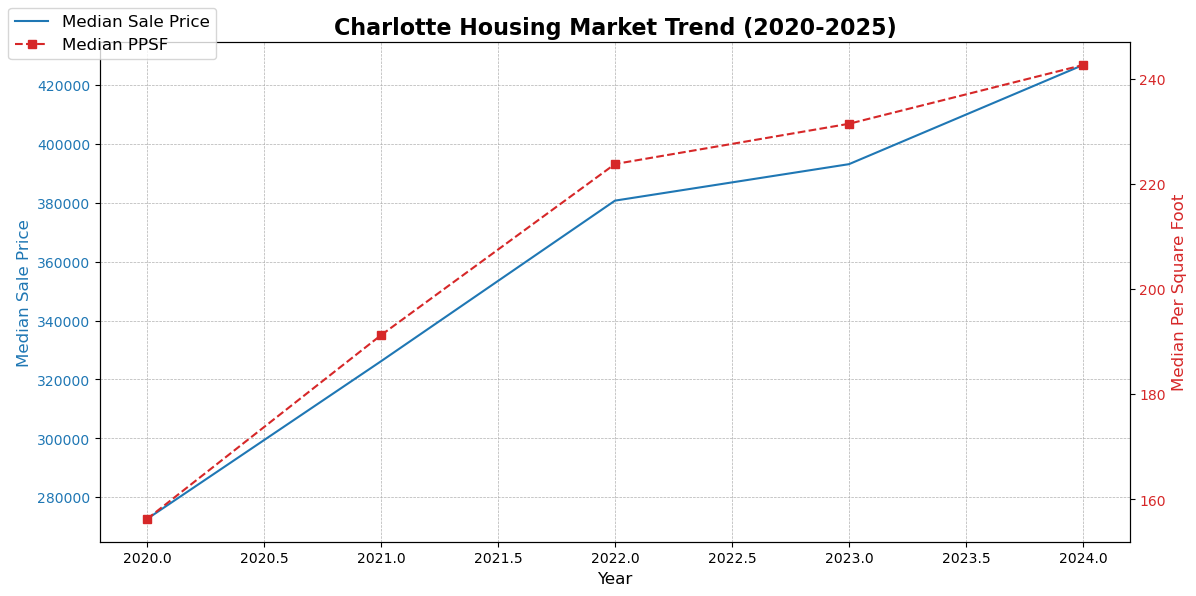

In [48]:
fig, ax1 = plt.subplots(figsize=(12,6))
# Plot median sale price on the first y-axis
ax1.set_title('Charlotte Housing Market Trend (2020-2025)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Median Sale Price', color='tab:blue', fontsize=12)
ax1.plot(yearly_avg['year'], yearly_avg['median_sale_price'], label='Median Sale Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the median PPSF
ax2 = ax1.twinx()
ax2.set_ylabel('Median Per Square Foot', color='tab:red', fontsize=12)
ax2.plot(yearly_avg['year'], yearly_avg['median_ppsf'], label='Median PPSF', color='tab:red', marker='s', linestyle='--', markersize=6)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=10)
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

fig.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('charlotte_housing_Market_2020_25.png')
plt.show()

$Analysis:$
- **Charlotte Housing Market Surge (2020-2025):**  
  - The median sale price** increased significantly, rising from below 280K in 2020 to over 420K in 2025.  
  - The median price per square foot also saw a substantial rise, growing from below 160 in 2020 to above $240 in 2024.

$Key Insights:$
- The consistent rise in home prices reflects strong demand and market growth in Charlotte.
- The increase in price per square foot indicates appreciation in property value** and possible constraints on housing supply.


In [49]:
# Grouping listing price, sale price and inventory coulmns by year
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_average = charlotte_data_copy.groupby('year').agg(
    listing_price=('median_list_price', 'mean'),
    sale_price=('median_sale_price', 'mean'), 
    inventory =('inventory', 'mean')
).reset_index()
yearly_average.head()

year  listing_price    sale_price    inventory
0  2020   291759.18750  272626.53125  1228.728814
1  2021   339648.03125  326185.15625   901.766667
2  2022   384997.50000  380727.96875   777.200000
3  2023   403750.00000  393108.40625   755.266667
4  2024   417080.62500  426767.09375   981.833333

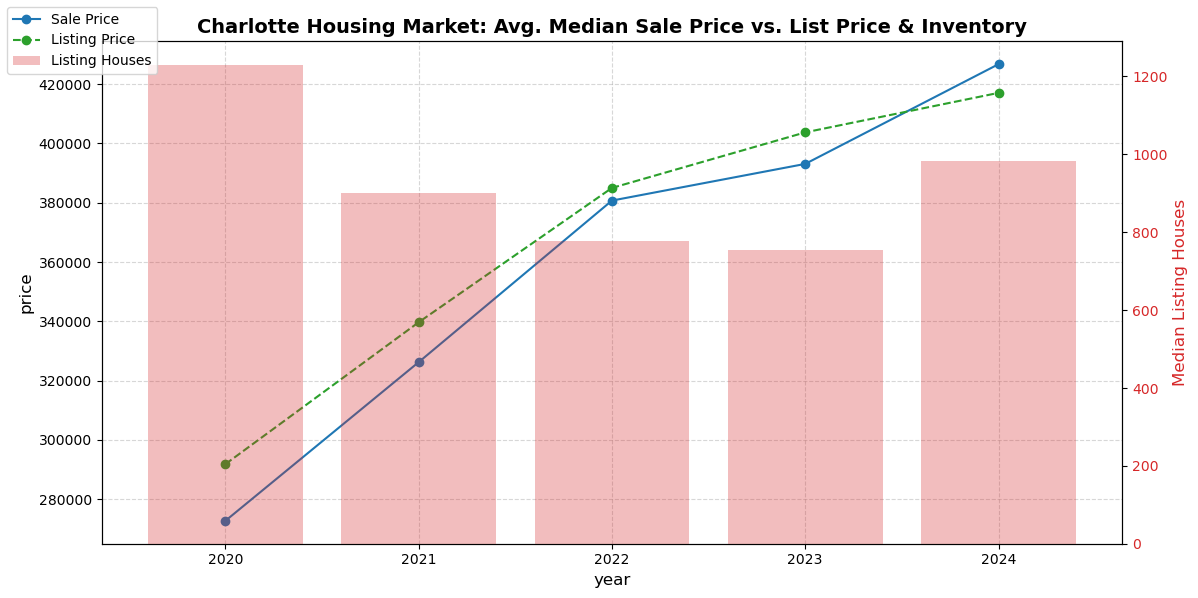

In [50]:
# Drawing line charge to compare the listing and sale pricea as well as the inventory over the last five year 

fig, ax1 = plt.subplots(figsize=(12,6))
# plotting list and sale price 
ax1.set_xlabel('year', fontsize=12)
ax1.set_ylabel('price', fontsize=12)
ax1.plot(yearly_average['year'], yearly_average['sale_price'], 
         label='Sale Price', color='tab:blue', marker="o")
ax1.plot(yearly_average['year'], yearly_average['listing_price'], 
         label='Listing Price', color='tab:green', marker='o', linestyle='--')

# plot the second y axis 
ax2 = ax1.twinx()
ax2.set_ylabel('Median Listing Houses', color='tab:red', fontsize=12)
ax2.bar(yearly_average['year'], yearly_average['inventory'], 
        color='tab:red', alpha=0.3, label='Listing Houses')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Charlotte Housing Market: Avg. Median Sale Price vs. List Price & Inventory", fontsize=14, fontweight='bold')
fig.legend(loc='upper left', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('CLT_sale_list_inven.png')
plt.show()

$Analysis$
- In 2020, the housing market had over 1,200 median active listings, while the median sale price was below 280,000, and the median listing price was slightly below 300,000. This indicates that real estate companies were selling homes below the listing price. Although there were plenty of houses available, buyer demand was low.

- In contrast, by 2024, the number of available homes had dropped to just below 1,000, while the median sale price exceeded 420,000, and the median listing price was slightly below 420,000. This trend suggests that with fewer homes on the market, demand has increased, leading to higher prices. Notably, real estate companies are now selling homes above the listing price, highlighting a stronger seller’s market.

#### Merging Charlotte, Houston, and Virginia Beach data based on year, along with their respective median listing price, median sale price, and median inventory values.

In [51]:
# copy the dataframes
houston_TX = houston_TX.copy() 
virginia_beach_data = virginia_beach_data.copy()  
charlotte_data = charlotte_data.copy()


In [52]:
# convert datetime for all dataframes (period_begin coulmn)
houston_TX['period_begin'] = pd.to_datetime(houston_TX['period_begin'], errors='coerce')
virginia_beach_data['period_begin'] = pd.to_datetime(virginia_beach_data['period_begin'], errors='coerce')
charlotte_data['period_begin'] = pd.to_datetime(charlotte_data['period_begin'], errors='coerce')

In [53]:
# Select the year from each cities dates 
charlotte_data.loc[:, 'year'] = charlotte_data['period_begin'].dt.year
houston_TX.loc[:, 'year'] = houston_TX['period_begin'].dt.year
virginia_beach_data.loc[:, 'year'] = virginia_beach_data['period_begin'].dt.year

# Aggrigate the merged columns based on year and renam the columns using the city initialls
charlotte_agg = charlotte_data.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'mean',
    'median_list_price': 'mean'
}).reset_index().rename(columns={
    'median_sale_price': 'charlotte_sale_price',
    'median_ppsf': 'charlotte_ppsf',
    'inventory': 'charlotte_inventory',
    'median_list_price': 'charlotte_listing_price'
})

houston_agg = houston_TX.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'mean',
    'median_list_price': 'mean'
}).reset_index().rename(columns={
    'median_sale_price': 'houston_sale_price',
    'median_ppsf': 'houston_ppsf',
    'inventory': 'houston_inventory',
    'median_list_price': 'houston_listing_price'
})

virginia_beach_agg = virginia_beach_data.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'mean',
    'median_list_price': 'mean'
    
}).reset_index().rename(columns={
    'median_sale_price': 'virginia_beach_sale_price',
    'median_ppsf': 'virginia_beach_ppsf',
    'inventory': 'virginia_beach_inventory',
    'median_list_price': 'virginia_beach_listing_price'
})


merged_city_data = charlotte_agg.merge(houston_agg, on='year', how='outer')
merged_city_data = merged_city_data.merge(virginia_beach_agg, on='year', how='outer')
merged_city_data.head()

year  charlotte_sale_price  charlotte_ppsf  charlotte_inventory  \
0  2020          272626.53125      166.797623          1228.728814   
1  2021          326185.15625      199.530548           901.766667   
2  2022          380727.96875      231.725647           777.200000   
3  2023          393108.40625      238.749329           755.266667   
4  2024          426767.09375      257.400299           981.833333   

   charlotte_listing_price  houston_sale_price  houston_ppsf  \
0             291759.18750       252925.025000    135.559494   
1             339648.03125       286295.816667    153.239496   
2             384997.50000       308355.075000    167.274235   
3             403750.00000       309670.083333    171.956629   
4             417080.62500       328160.000000    176.847848   

   houston_inventory  houston_listing_price  virginia_beach_sale_price  \
0        3005.100000          299483.291667              287821.059322   
1        2326.133333          321082.833333              341752.500000   
2        2090.933333          338083.333333              351352.864407   
3        2262.200000          336888.625000              412520.118182   
4        2830.166667          344499.250000              407627.293103   

   virginia_beach_ppsf  virginia_beach_inventory  virginia_beach_listing_price  
0           169.623699                471.694915                 293343.220339  
1           187.008320                327.100000                 313788.101695  
2           208.476483                269.084746                 336505.172414  
3           225.667012                265.236364                 363150.000000  
4           237.328852                289.000000                 384129.603448

In [54]:
merged_city_data.to_csv("listing_sale_inve_4_CLT_HU_VA.csv")

## Houston, TX Overtime Housing Price Trend Analysis

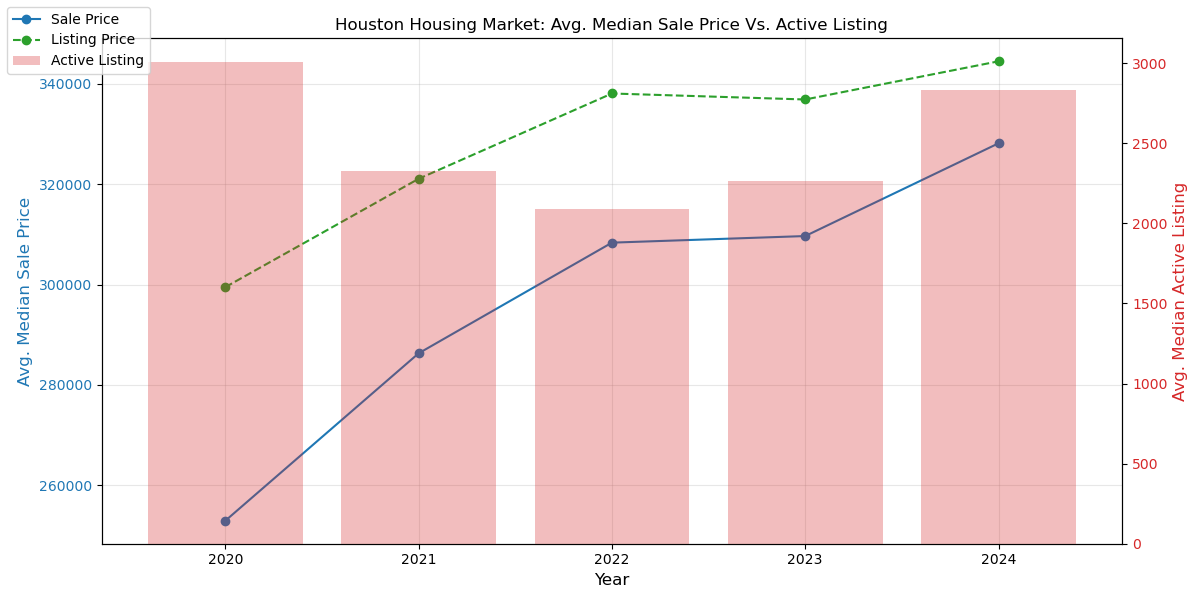

In [55]:
year = merged_city_data['year']
houston_sale_price = merged_city_data['houston_sale_price']
houston_listing_price = merged_city_data['houston_listing_price']
houston_inventory = merged_city_data['houston_inventory']

fig_main, ax_main = plt.subplots(figsize=(12,6))

# line chart for sale price 
ax_main.set_ylabel('Avg. Median Sale Price', color='tab:blue', fontsize=12)
ax_main.set_xlabel('Year', fontsize=12)
ax_main.plot(year, houston_sale_price, label='Sale Price', color='tab:blue', marker='o', linestyle='-')
ax_main.plot(year, houston_listing_price, label='Listing Price', color='tab:green', marker='o', linestyle='--')
ax_main.tick_params(axis='y', labelcolor='tab:blue')

# bar chart for inventory 
ax_main1 = ax_main.twinx()
ax_main1.set_ylabel('Avg. Median Active Listing', color='tab:red', fontsize=12)
ax_main1.bar(year, houston_inventory, color='tab:red', alpha=0.3, label='Active Listing')
ax_main1.tick_params(axis='y', labelcolor='tab:red')

# title and lengend 
plt.title('Houston Housing Market: Avg. Median Sale Price Vs. Active Listing')
fig_main.legend(loc='upper left', fontsize=10)
ax_main.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('houston__sale_list_inven.png')
plt.show()

$Analysis$
- In 2020, the housing market had over 3,000 average median active listings, while the average median sale price was below 200,000. Meanwhile, the average median listing price was significantly higher, at 300,000. This indicates that real estate companies were selling homes well below the listing price. Although the average median number of available homes exceeded 3,000, buyer demand appeared to be low.
- In contrast, by 2024, the average median number of available homes had dropped slightly below 3,000, while the average median sale price surpassed 320,000, and the average median listing price was slightly above 340,000. This decline in inventory, combined with rising prices, suggests that the housing market may have become more competitive, favoring sellers over buyers.

  

In [56]:
merged_city_data.head()

year  charlotte_sale_price  charlotte_ppsf  charlotte_inventory  \
0  2020          272626.53125      166.797623          1228.728814   
1  2021          326185.15625      199.530548           901.766667   
2  2022          380727.96875      231.725647           777.200000   
3  2023          393108.40625      238.749329           755.266667   
4  2024          426767.09375      257.400299           981.833333   

   charlotte_listing_price  houston_sale_price  houston_ppsf  \
0             291759.18750       252925.025000    135.559494   
1             339648.03125       286295.816667    153.239496   
2             384997.50000       308355.075000    167.274235   
3             403750.00000       309670.083333    171.956629   
4             417080.62500       328160.000000    176.847848   

   houston_inventory  houston_listing_price  virginia_beach_sale_price  \
0        3005.100000          299483.291667              287821.059322   
1        2326.133333          321082.833333              341752.500000   
2        2090.933333          338083.333333              351352.864407   
3        2262.200000          336888.625000              412520.118182   
4        2830.166667          344499.250000              407627.293103   

   virginia_beach_ppsf  virginia_beach_inventory  virginia_beach_listing_price  
0           169.623699                471.694915                 293343.220339  
1           187.008320                327.100000                 313788.101695  
2           208.476483                269.084746                 336505.172414  
3           225.667012                265.236364                 363150.000000  
4           237.328852                289.000000                 384129.603448

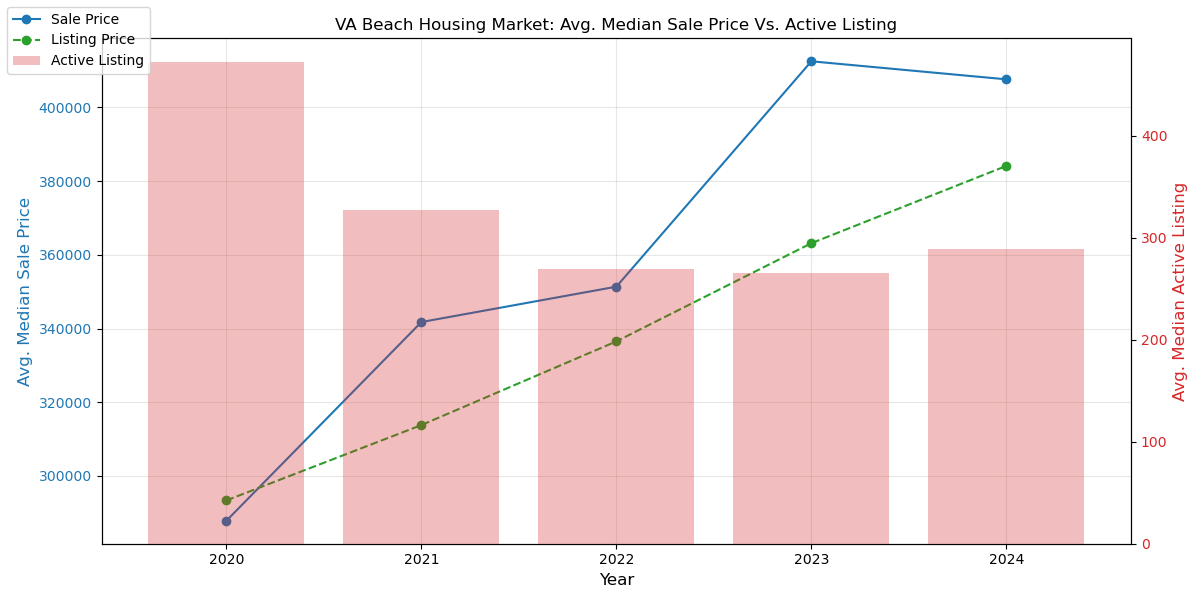

In [57]:
year = merged_city_data['year']
va_sale = merged_city_data['virginia_beach_sale_price']
va_listing = merged_city_data['virginia_beach_listing_price']
va_inventory = merged_city_data['virginia_beach_inventory']

fig_main, ax_main = plt.subplots(figsize=(12,6))

# line chart for sale price 
ax_main.set_ylabel('Avg. Median Sale Price', color='tab:blue', fontsize=12)
ax_main.set_xlabel('Year', fontsize=12)
ax_main.plot(year, va_sale, label='Sale Price', color='tab:blue', marker='o', linestyle='-')
ax_main.plot(year, va_listing, label='Listing Price', color='tab:green', marker='o', linestyle='--')
ax_main.tick_params(axis='y', labelcolor='tab:blue')

# bar chart for inventory 
ax_main1 = ax_main.twinx()
ax_main1.set_ylabel('Avg. Median Active Listing', color='tab:red', fontsize=12)
ax_main1.bar(year, va_inventory, color='tab:red', alpha=0.3, label='Active Listing')
ax_main1.tick_params(axis='y', labelcolor='tab:red')

# title and lengend 
plt.title('VA Beach Housing Market: Avg. Median Sale Price Vs. Active Listing')
fig_main.legend(loc='upper left', fontsize=10)
ax_main.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('va_beacb__sale_list_inven.png')
plt.show()

$Analysis$
- In 2020, the average median housing price in Virginia Beach was below 300,000, while the listing price was slightly above the selling price but still under 300,000. This indicates that home prices were relatively low, even though the average median number of available homes on the market was above 400. Real estate companies were selling house below the listing price.
- By 2024, the average median number of available homes had dropped slightly below 300, while the average median selling price had risen to over 400,000. This suggests that housing demand was increasing. Meanwhile, the average median listing price remained well below 400,000 significantly lower than the selling price, indicating that real estate companies were selling homes above the listed price, further highlighting the strong demand in the housing market.

#### Housing Market Trend Analysis for Houston, Charlotte and Virginia Beach 

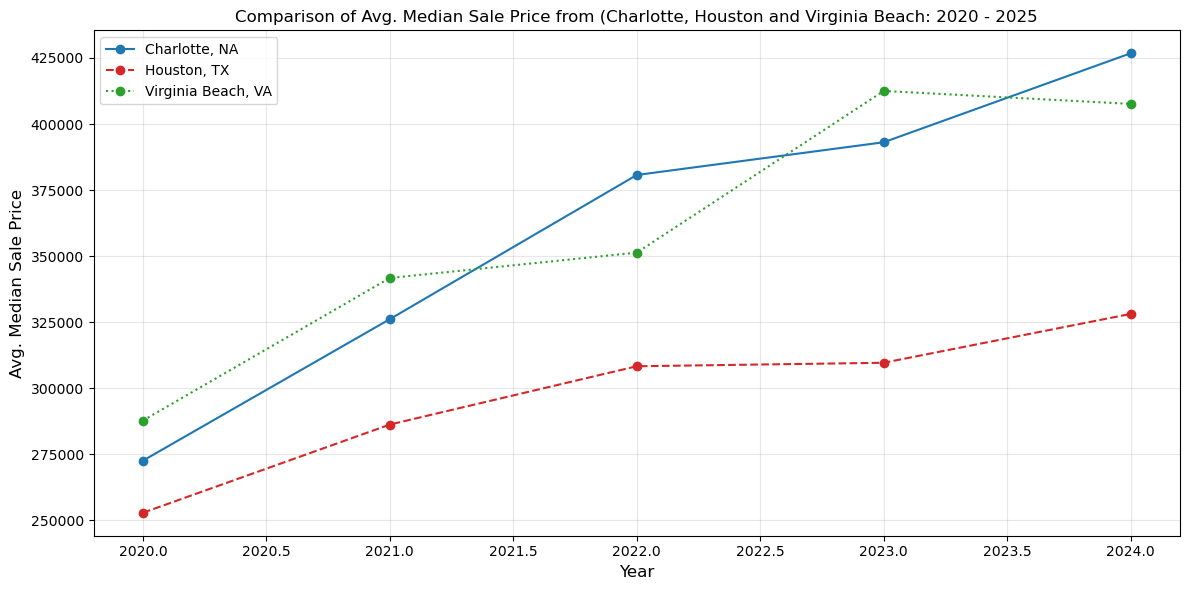

In [58]:
year = merged_city_data['year']
clt_price = merged_city_data['charlotte_sale_price']
houston_price = merged_city_data['houston_sale_price']
va_beach_price = merged_city_data['virginia_beach_sale_price']

plt.figure(figsize=(12,6))
plt.plot(year, clt_price, label='Charlotte, NA', color='tab:blue', marker='o', linestyle='-')
plt.plot(year, houston_price, label='Houston, TX', color='tab:red', marker='o', linestyle='--')
plt.plot(year, va_beach_price, label='Virginia Beach, VA', color='tab:green', marker='o', linestyle=':')

plt.ylabel('Avg. Median Sale Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Comparison of Avg. Median Sale Price from (Charlotte, Houston and Virginia Beach: 2020 - 2025')

plt.legend()
plt.grid(alpha=0.3)

plt.savefig('comparison_clt_hou_Va_sale_price.png')
plt.tight_layout()
plt.show()

$Analysis$ 
- The average median sale price in Charlotte consistently increased, showing a steady growth over the years.
- Houston experienced moderate growth from 2020 to 2022, but prices remained flat between 2022 and 2023 before slightly increasing in 2024.
- Virginia Beach saw significant growth between 2020 and 2023, but the price slightly declined in 2024 below Charlotte.
The housing market in these cities reflects strong demand and price appreciation over the years. Charlotte appears to be the most promising market, while Houston shows some stagnation. Virginia Beach had a rapid price increase but may be stabilizing.


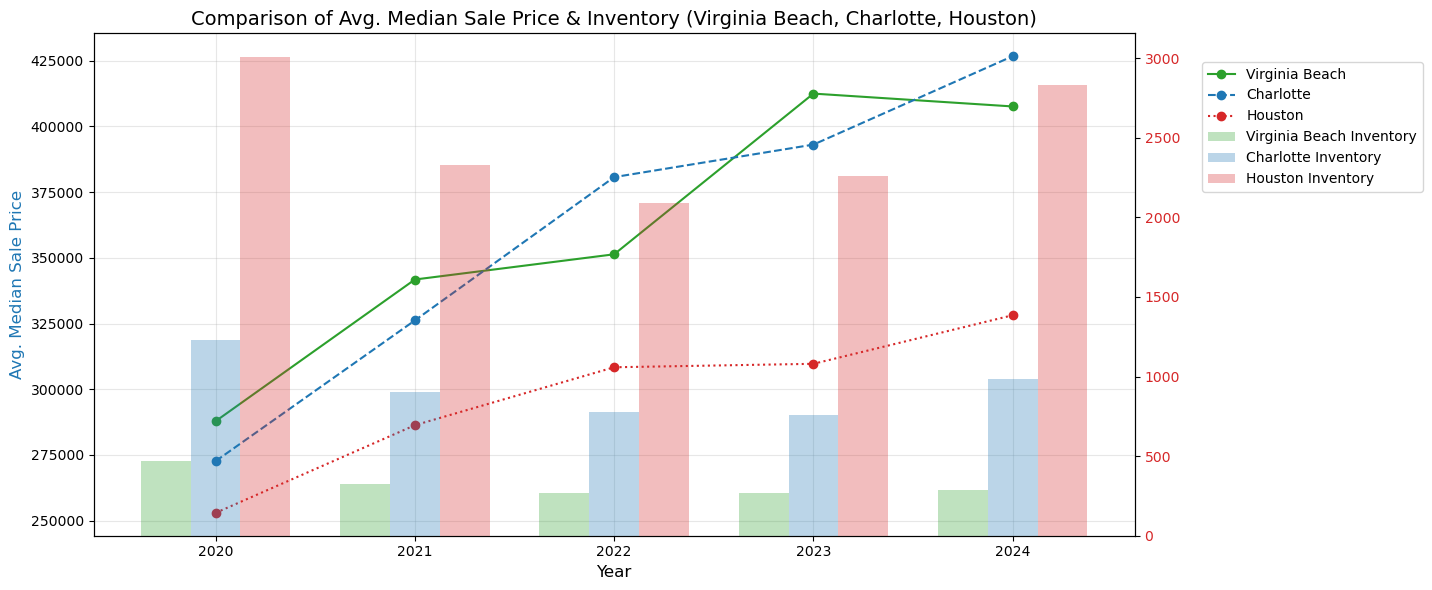

In [59]:
year = merged_city_data['year']
va_price = merged_city_data['virginia_beach_sale_price']
va_inventory = merged_city_data['virginia_beach_inventory']
charlotte_price = merged_city_data['charlotte_sale_price']
charlotte_inventory= merged_city_data['charlotte_inventory']
houston_price = merged_city_data['houston_sale_price']
houston_inventory = merged_city_data['houston_inventory']
fig, main_ax = plt.subplots(figsize=(12,6))
main_ax.set_xlabel('Year', fontsize=12)
main_ax.set_ylabel('Avg. Median Sale Price', fontsize=12, color='tab:blue')

main_ax.plot(year, va_price, label='Virginia Beach', color='tab:green', marker='o', linestyle='-')
main_ax.plot(year, charlotte_price, label='Charlotte', color='tab:blue', marker='o', linestyle='--')
main_ax.plot(year, houston_price, label='Houston', color='tab:red', marker='o', linestyle=':')

main_ax2 = main_ax.twinx()
bar_width = 0.25

main_ax2.bar(year - bar_width, va_inventory, color='tab:green', alpha=0.3, label='Virginia Beach Inventory', width=bar_width)
main_ax2.bar(year, charlotte_inventory, color='tab:blue', alpha=0.3, label='Charlotte Inventory', width=bar_width)
main_ax2.bar(year + bar_width, houston_inventory, color='tab:red', alpha=0.3, label='Houston Inventory', width=bar_width)

main_ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparison of Avg. Median Sale Price & Inventory (Virginia Beach, Charlotte, Houston)', fontsize=14)
fig.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 0.9))
main_ax.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('clt_hus_va_sale_inventory_coparison.png')
plt.show()



# Analysis

### Housing Market

- Virginia Beach's average median house price steadily increased from 2020 to 2023, peaking around 2023 before slightly declining in 2024. This suggests a cooling market after a period of rising prices.
- The Charlotte housing market shows a steady and continuous increase across all years. This suggests Charlotte is experiencing strong housing demand and market growth, likely driven by population increase and economic expansion.
- The Houston average sale price is the lowest among the three cities, but it shows a steady increase over time. The price growth appears less volatile than Virginia Beach's appreciation trend.

### Available Housing Throughout the Year

- Houston has significantly higher available housing compared to Charlotte and Virginia Beach. However, its inventory declined after 2021. The trend shows a gradual decrease in available homes, which could push prices up over time.
- Charlotte relatively has stable inventory with slight variation. A steady balance in supply likely supports continuous price increases.
- Virginia Beach has the lowest inventory levels among the three cities. The constrained supply may be a key driver behind higher price volatility, as even small changes in demand can lead to price fluctuations.

## Analysis by ADontae

0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


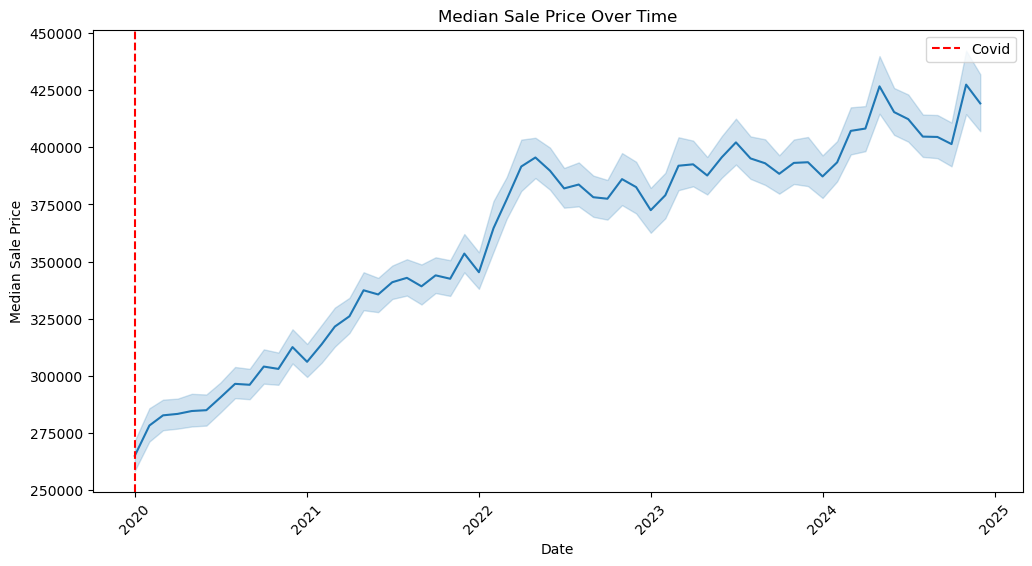

In [60]:
# Convert period_begin to datetime
housing_data['period_begin'] = pd.to_datetime(housing_data['period_begin'], errors='coerce')

# Check for any conversion issues
print(housing_data['period_begin'].isna().sum())

# Ensure that other relevant columns are numeric
housing_data['median_sale_price'] = pd.to_numeric(housing_data['median_sale_price'], errors='coerce')
housing_data['inventory'] = pd.to_numeric(housing_data['inventory'], errors='coerce')
housing_data['pending_sales'] = pd.to_numeric(housing_data['pending_sales'], errors='coerce')

# Plot median sale price over time
# Plot median sale price over time with annotations
plt.figure(figsize=(12, 6))
sns.lineplot(data=housing_data, x='period_begin', y='median_sale_price')
plt.title('Median Sale Price Over Time')
plt.xlabel('Date')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)
plt.axvline(pd.Timestamp('2020-01-01'), color='r', linestyle='--', label='Covid')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


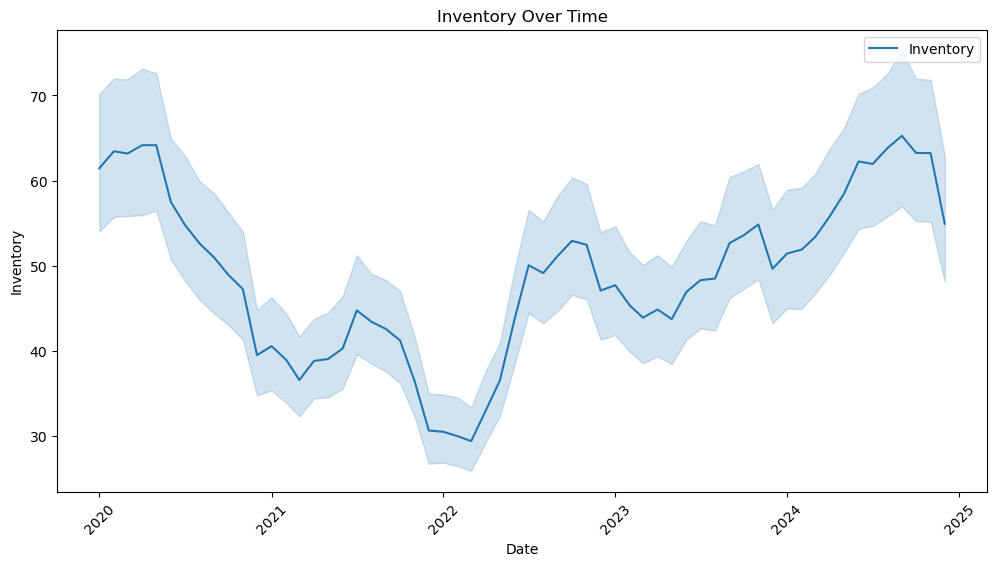

In [61]:
# Plot inventory over time with a trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=housing_data, x='period_begin', y='inventory', label='Inventory')
plt.title('Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


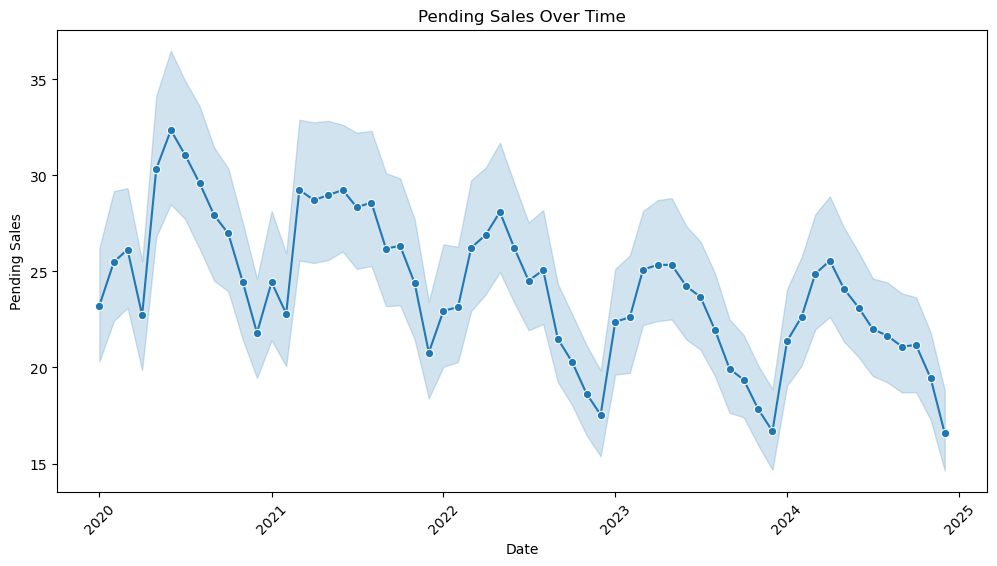

In [62]:
# Plot pending sales over time with markers
plt.figure(figsize=(12, 6))
sns.lineplot(data=housing_data, x='period_begin', y='pending_sales', marker='o')
plt.title('Pending Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Pending Sales')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

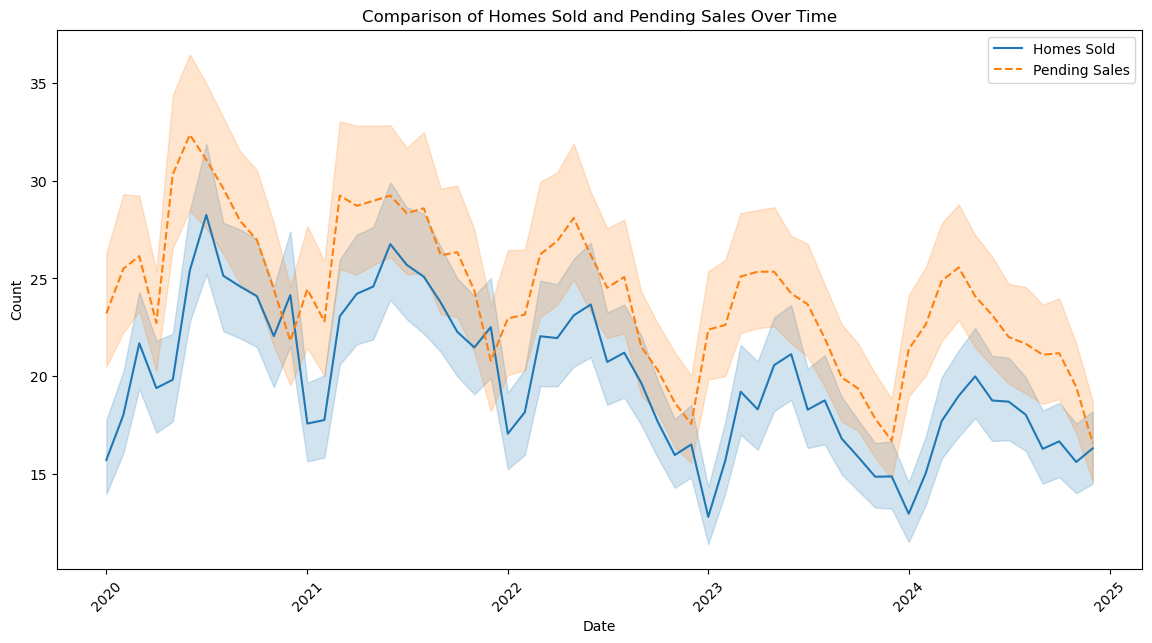

In [63]:
# Plot homes_sold and pending_sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=housing_data, x='period_begin', y='homes_sold', label='Homes Sold')
sns.lineplot(data=housing_data, x='period_begin', y='pending_sales', label='Pending Sales', linestyle='--')
plt.title('Comparison of Homes Sold and Pending Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [64]:
# Group by state and calculate key metrics
state_data = housing_data.groupby('state').agg({
    'median_sale_price': 'median',
    'median_dom': 'median',
    'inventory': 'sum'
}).reset_index()

# Display the calculated metrics
print(state_data)

            state  median_sale_price  median_dom  inventory
0  North Carolina           278750.0        46.0  2501935.0
1           Texas           270995.0        44.0  7019002.0
2        Virginia           370000.0        28.0  1336997.0


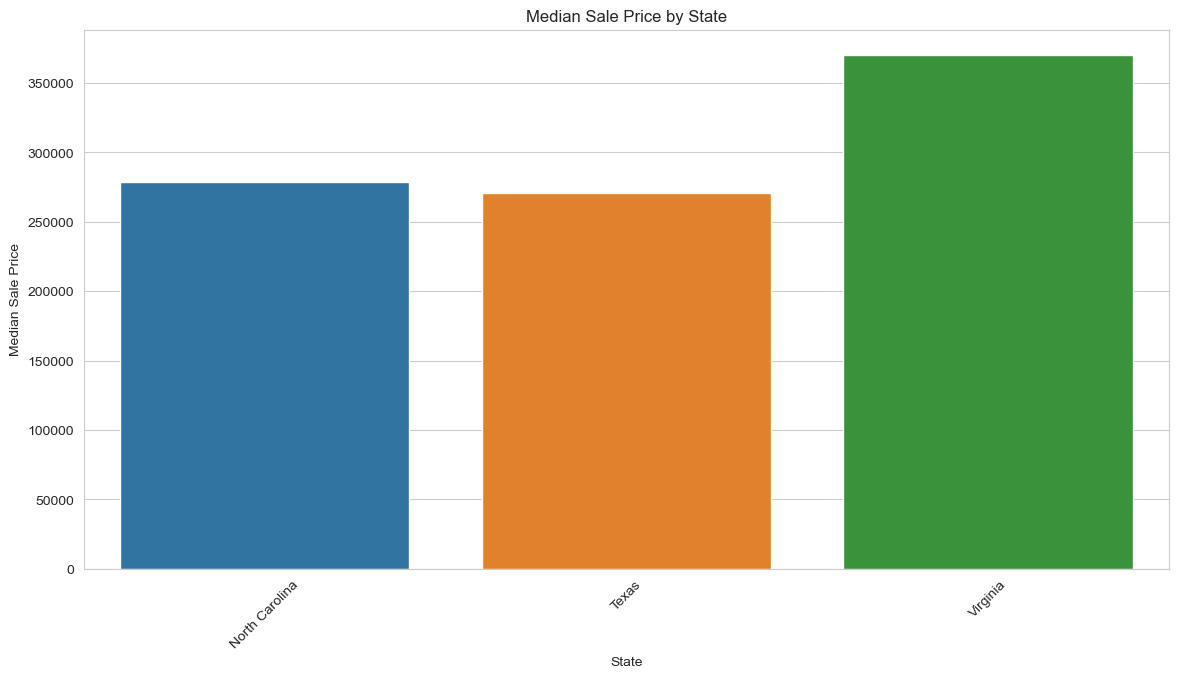

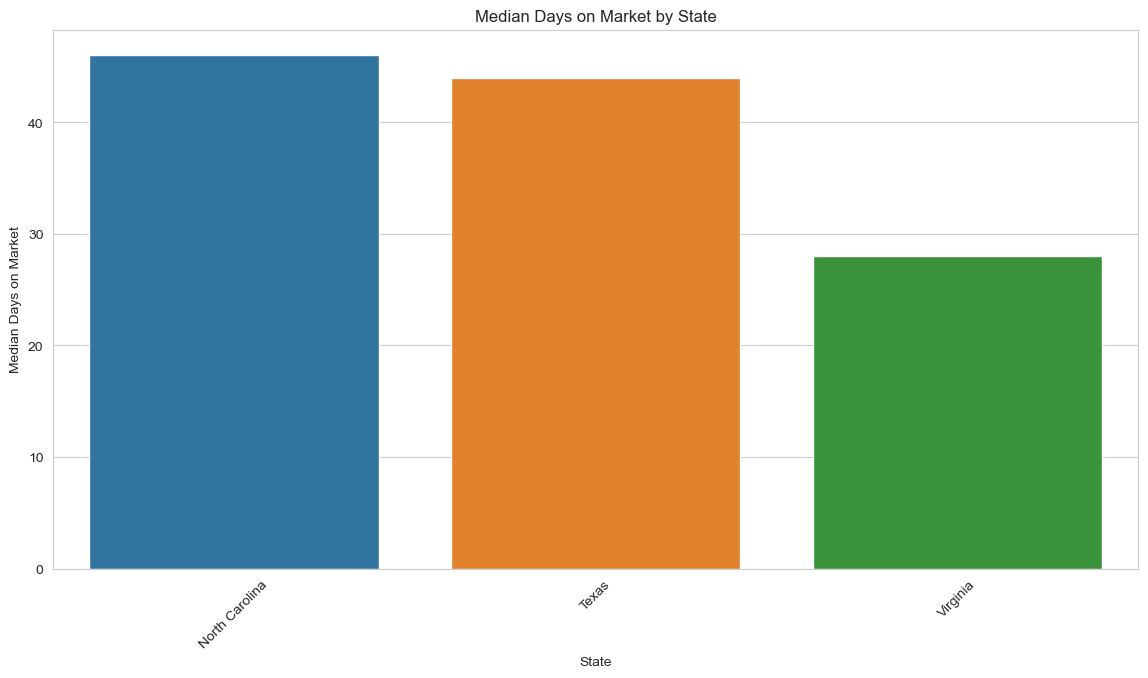

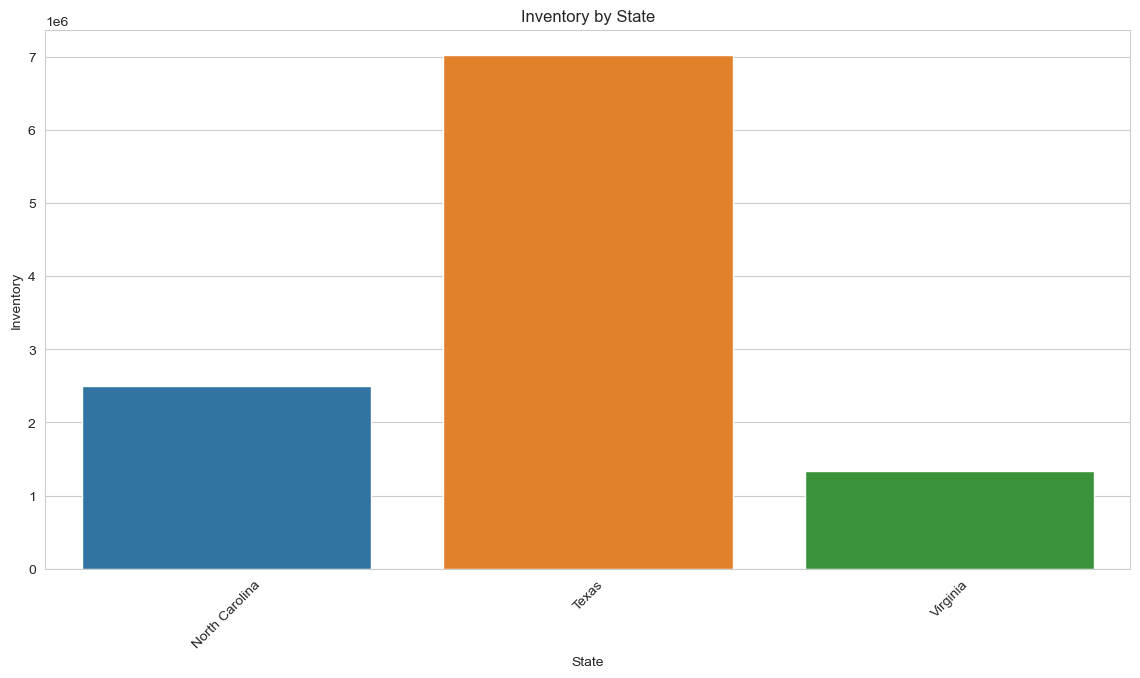

In [65]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot median sale price by state
plt.figure(figsize=(14, 7))
sns.barplot(data=state_data, x='state', y='median_sale_price')
plt.title('Median Sale Price by State')
plt.xlabel('State')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)
plt.show()

# Plot median days on market by state
plt.figure(figsize=(14, 7))
sns.barplot(data=state_data, x='state', y='median_dom')
plt.title('Median Days on Market by State')
plt.xlabel('State')
plt.ylabel('Median Days on Market')
plt.xticks(rotation=45)
plt.show()

# Plot inventory by state
plt.figure(figsize=(14, 7))
sns.barplot(data=state_data, x='state', y='inventory')
plt.title('Inventory by State')
plt.xlabel('State')
plt.ylabel('Inventory')
plt.xticks(rotation=45)
plt.show()


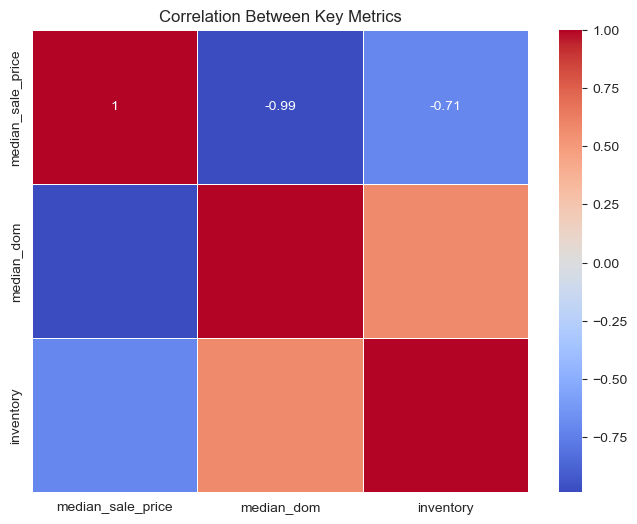

In [66]:
# Calculate correlations between key metrics
correlation_matrix = state_data[['median_sale_price', 'median_dom', 'inventory']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Key Metrics')
plt.show()


$ Conclusion $
- Housing affordability varies across different states. Factors such as median sale price, median days on market, and inventory levels influence affordability.
- By analyzing these metrics, we can better understand state-level disparities in housing affordability and identify the driving factors behind these changes.")


In [67]:
# Replace 'your_file.xlsx' with the path to your Excel file
InterestRates = 'historicalweeklydata.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(InterestRates)

# Display the first few rows of the DataFrame
df.tail()

Week  U.S 30 yr FRM 30 yr fees and points  U.S. 15yr FRM  points  \
2806 2025-01-09           6.93                   NaN           6.14     NaN   
2807 2025-01-16           7.04                   NaN           6.27     NaN   
2808 2025-01-23           6.96                   NaN           6.16     NaN   
2809 2025-01-30           6.95                   NaN           6.12     NaN   
2810 2025-02-06           6.89                   NaN           6.05     NaN   

      ARM  points.1  margin  spread  
2806  NaN       NaN     NaN     NaN  
2807  NaN       NaN     NaN     NaN  
2808  NaN       NaN     NaN     NaN  
2809  NaN       NaN     NaN     NaN  
2810  NaN       NaN     NaN     NaN

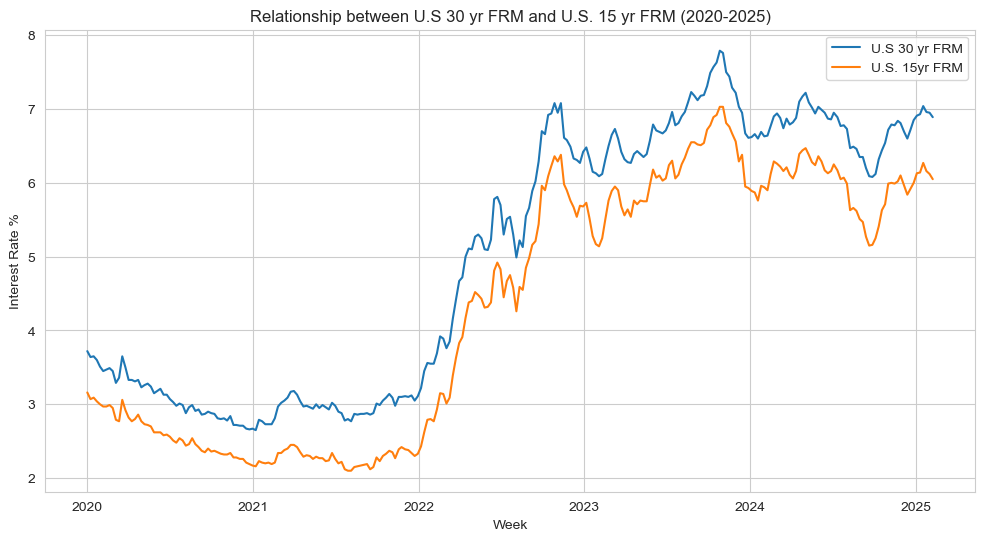

In [68]:
# Drop rows with invalid 'Week' values
df.dropna(subset=['Week'], inplace=True)

# Filter the data for the dates between 2020 and 2025
start_date = '2020-01-01'
end_date = '2025-12-31'
filtered_df = df[(df['Week'] >= start_date) & (df['Week'] <= end_date)]

# Display the filtered dataframe
filtered_df.head()

# Plotting the relationship between U.S 30 year FRM and U.S 15 year FRM
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Week'], filtered_df['U.S 30 yr FRM'], label='U.S 30 yr FRM')
plt.plot(filtered_df['Week'], filtered_df['U.S. 15yr FRM'], label='U.S. 15yr FRM')

# Adding title and labels
plt.title('Relationship between U.S 30 yr FRM and U.S. 15 yr FRM (2020-2025)')
plt.xlabel('Week')
plt.ylabel('Interest Rate %')
plt.legend()

# Show plot
plt.show()

In [69]:
# Load the Excel file
historical_data_path = 'historicalweeklydata.xlsx'
df_excel = pd.read_excel(historical_data_path)

# Convert the 'Week' column to datetime and coerce errors
df_excel['Week'] = pd.to_datetime(df_excel['Week'], errors='coerce')

# Drop rows with invalid 'Week' values
df_excel.dropna(subset=['Week'], inplace=True)

# Filter the data for the dates between 2020 and 2025
start_date = '2020-01-01'
end_date = '2025-12-31'
filtered_df_excel = df_excel[(df_excel['Week'] >= start_date) & (df_excel['Week'] <= end_date)]

# Load the CSV file
five_years_data_path = 'five_years_data'
df_csv = pd.read_csv(five_years_data_path)

# Convert the 'Date' column to datetime (assuming 'Date' is the correct column name)
df_csv['Date'] = pd.to_datetime(df_csv['period_end'])

# Merge the dataframes on the 'Week' and 'Date' columns
merged_df = pd.merge(filtered_df_excel, df_csv, left_on='Week', right_on='Date', how='inner')

# Display the merged dataframe
merged_df.head()

Week  U.S 30 yr FRM 30 yr fees and points  U.S. 15yr FRM  points  \
0 2020-04-30           3.23                   0.7           2.77     0.6   
1 2020-04-30           3.23                   0.7           2.77     0.6   
2 2020-04-30           3.23                   0.7           2.77     0.6   
3 2020-04-30           3.23                   0.7           2.77     0.6   
4 2020-04-30           3.23                   0.7           2.77     0.6   

    ARM  points.1  margin  spread period_begin  ... new_listings inventory  \
0  3.14       0.4    2.75    0.09   2020-04-01  ...          NaN       NaN   
1  3.14       0.4    2.75    0.09   2020-04-01  ...         39.0     107.0   
2  3.14       0.4    2.75    0.09   2020-04-01  ...          2.0       6.0   
3  3.14       0.4    2.75    0.09   2020-04-01  ...         20.0      62.0   
4  3.14       0.4    2.75    0.09   2020-04-01  ...          4.0       7.0   

  months_of_supply  median_dom  avg_sale_to_list  sold_above_list  \
0              NaN       129.0          0.981964         0.000000   
1              3.1        72.0          0.978949         0.147059   
2              3.0       197.0          1.000000         0.000000   
3              2.3        22.0          0.978956         0.111111   
4              1.8         8.0          0.991507         0.250000   

   off_market_in_two_weeks  parent_metro_region  \
0                      NaN       Fort Worth, TX   
1                 0.029412     Fayetteville, NC   
2                 0.000000     Harrisonburg, VA   
3                 0.280000          Houston, TX   
4                 1.000000         Richmond, VA   

   parent_metro_region_metro_code       Date  
0                           23104 2020-04-30  
1                           22180 2020-04-30  
2                           25500 2020-04-30  
3                           26420 2020-04-30  
4                           40060 2020-04-30  

[5 rows x 30 columns]

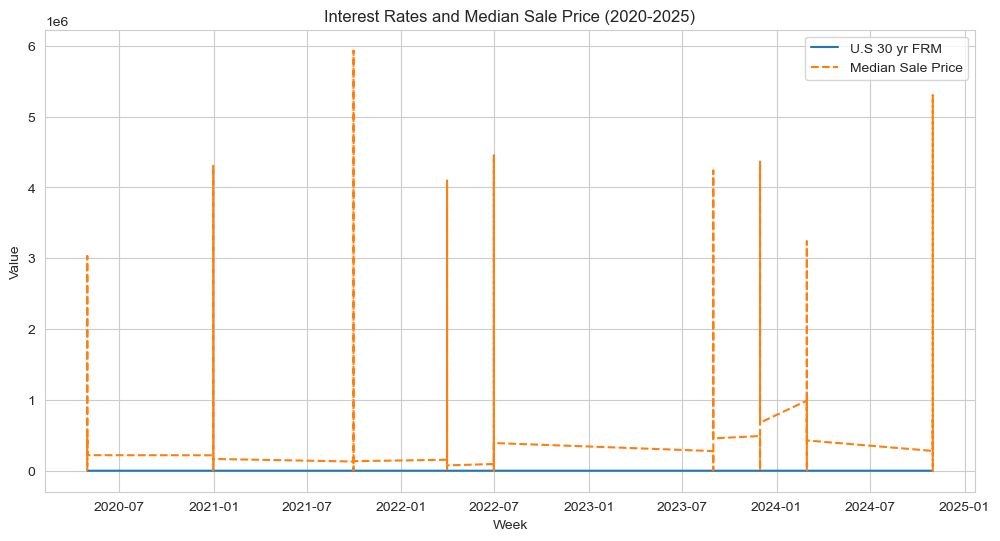

In [70]:
# Plotting interest rates and median sale price over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Week'], merged_df['U.S 30 yr FRM'], label='U.S 30 yr FRM')
plt.plot(merged_df['Week'], merged_df['median_sale_price'], label='Median Sale Price', linestyle='--')

# Adding title and labels
plt.title('Interest Rates and Median Sale Price (2020-2025)')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()

In [71]:
# Reload the CSV data
file_path = 'five_years_data'
data = pd.read_csv(file_path)

# Convert period_begin to datetime and extract the year
data['period_begin'] = pd.to_datetime(data['period_begin'])
data['year'] = data['period_begin'].dt.year

# Group by city and year, and calculate the median sale price for each group
grouped_price = data.groupby(['city', 'year'])['median_sale_price'].median().reset_index()

# Calculate price growth as percentage change
grouped_price['price_growth'] = grouped_price.groupby('city')['median_sale_price'].pct_change() * 100

# Show the grouped data with price growth
import ace_tools_open as tools; tools.display_dataframe_to_user(name="City Price Growth", dataframe=grouped_price)
grouped_price.head()

City Price Growth


city  year  median_sale_price  price_growth
0  Abbs Valley  2021            83700.0           NaN
1  Abbs Valley  2022           156000.0     86.379928
2  Abbs Valley  2023            60500.0    -61.217949
3  Abbs Valley  2024            25000.0    -58.677686
4     Aberdeen  2020           259250.0           NaN

In [72]:
# Show the grouped data with price growth using Pandas' display function
grouped_price.head()


city  year  median_sale_price  price_growth
0  Abbs Valley  2021            83700.0           NaN
1  Abbs Valley  2022           156000.0     86.379928
2  Abbs Valley  2023            60500.0    -61.217949
3  Abbs Valley  2024            25000.0    -58.677686
4     Aberdeen  2020           259250.0           NaN

In [73]:
# Group by city and year, and calculate the median of median_dom for each group
grouped_dom = data.groupby(['city', 'year'])['median_dom'].median().reset_index()

# Sort by median_dom (shortest first)
grouped_dom = grouped_dom.sort_values(by='median_dom', ascending=True)

# Show the grouped data with median_dom
grouped_dom.head()

city  year  median_dom
2027             Cool  2021         1.0
2544           Dudley  2023         1.0
5937      Middlebrook  2020         1.0
6478  New Summerfield  2023         1.0
7635           Reklaw  2023         1.0

In [ ]:
'''# Plotting the price growth by city
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_price, x='price_growth', y='city', palette='viridis')

# Add labels and title
plt.title('Price Growth by City (Highest to Lowest)', fontsize=16)
plt.xlabel('Price Growth (%)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.show()
'''

In [76]:
'''
# Plotting the price growth by city
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_price, x='price_growth', y='city')

# Add labels and title
plt.title('Price Growth by City (Highest to Lowest)', fontsize=16)
plt.xlabel('Price Growth (%)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.show()
'''

"\n# Plotting the price growth by city\nplt.figure(figsize=(12, 8))\nsns.barplot(data=grouped_price, x='price_growth', y='city')\n\n# Add labels and title\nplt.title('Price Growth by City (Highest to Lowest)', fontsize=16)\nplt.xlabel('Price Growth (%)', fontsize=12)\nplt.ylabel('City', fontsize=12)\n\n# Show the plot\nplt.show()\n"

In [77]:
# Sort cities by price growth (highest first) and display top cities
top_cities_growth = grouped_price.sort_values(by='price_growth', ascending=False)

# Show the top 10 cities with the highest price growth
top_cities_growth.head(10)[['city', 'price_growth']]

city  price_growth
6729    Old Hundred   4025.000000
3487    Glen Wilton   3558.333333
9567         Utopia   1632.851986
1375    Butterfield   1492.857143
1377    Butterfield   1114.285714
5884       Megargel   1094.117647
6035         Mingus   1077.884615
1220      Brookston   1077.514793
8433  Seven Springs    986.956522
2408         Devers    917.647059

In [78]:
# Extract the first and last year for each city
first_year_price = grouped_price.groupby('city').first().reset_index()
last_year_price = grouped_price.groupby('city').last().reset_index()

# Merge the first and last year data to compare prices
price_comparison = pd.merge(first_year_price, last_year_price, on='city', suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison['price_difference'] = price_comparison['median_sale_price_end'] - price_comparison['median_sale_price_start']
price_comparison['price_change_percentage'] = (price_comparison['price_difference'] / price_comparison['median_sale_price_start']) * 100

# Show the comparison
price_comparison[['city', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']].head(10)

city  median_sale_price_start  median_sale_price_end  \
0  Abbs Valley                  83700.0                25000.0   
1     Aberdeen                 259250.0               390925.0   
2    Abernathy                 150000.0               172500.0   
3      Abilene                 175000.0               234900.0   
4     Abingdon                 162250.0               280000.0   
5        Abram                  54000.0                54000.0   
6      Addison                 384000.0               558250.0   
7       Adrian                  42245.0                77300.0   
8      Advance                 261000.0               383000.0   
9        Afton                 342000.0               691000.0   

   price_difference  price_change_percentage  
0          -58700.0               -70.131422  
1          131675.0                50.790743  
2           22500.0                15.000000  
3           59900.0                34.228571  
4          117750.0                72.573190  
5               0.0                 0.000000  
6          174250.0                45.377604  
7           35055.0                82.980234  
8          122000.0                46.743295  
9          349000.0               102.046784

In [79]:
# Round the price change percentage to 1 decimal place
price_comparison['price_change_percentage'] = price_comparison['price_change_percentage'].round(1)

# Format the price change percentage as a string with "%" symbol
price_comparison['price_change_percentage'] = price_comparison['price_change_percentage'].astype(str) + '%'

# Show the updated comparison with the rounded price change percentage
price_comparison[['city', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']].head(10)

city  median_sale_price_start  median_sale_price_end  \
0  Abbs Valley                  83700.0                25000.0   
1     Aberdeen                 259250.0               390925.0   
2    Abernathy                 150000.0               172500.0   
3      Abilene                 175000.0               234900.0   
4     Abingdon                 162250.0               280000.0   
5        Abram                  54000.0                54000.0   
6      Addison                 384000.0               558250.0   
7       Adrian                  42245.0                77300.0   
8      Advance                 261000.0               383000.0   
9        Afton                 342000.0               691000.0   

   price_difference price_change_percentage  
0          -58700.0                  -70.1%  
1          131675.0                   50.8%  
2           22500.0                   15.0%  
3           59900.0                   34.2%  
4          117750.0                   72.6%  
5               0.0                    0.0%  
6          174250.0                   45.4%  
7           35055.0                   83.0%  
8          122000.0                   46.7%  
9          349000.0                  102.0%

In [80]:
# Group by state and city, and calculate the first and last year prices for each group
first_year_price_state = data.groupby(['state', 'city']).first().reset_index()
last_year_price_state = data.groupby(['state', 'city']).last().reset_index()

# Merge the first and last year data to compare prices, including state
price_comparison_state = pd.merge(first_year_price_state, last_year_price_state, on=['state', 'city'], suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']
price_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100

# Round the price change percentage to 1 decimal place and format as a percentage
price_comparison_state['price_change_percentage'] = price_comparison_state['price_change_percentage'].round(1).astype(str) + '%'

# Show the comparison by state and city
price_comparison_state[['state', 'city', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']].head(10)

state            city  median_sale_price_start  \
0  North Carolina        Aberdeen                 382450.0   
1  North Carolina         Advance                 630000.0   
2  North Carolina        Alamance                 170000.0   
3  North Carolina       Albemarle                 269000.0   
4  North Carolina          Alexis                 270000.0   
5  North Carolina        Alliance                  79000.0   
6  North Carolina       Altamahaw                 165000.0   
7  North Carolina  Anderson Creek                 282750.0   
8  North Carolina          Angier                 349706.0   
9  North Carolina      Ansonville                 158000.0   

   median_sale_price_end  price_difference price_change_percentage  
0               278000.0         -104450.0                  -27.3%  
1               170000.0         -460000.0                  -73.0%  
2               540000.0          370000.0                  217.6%  
3               141500.0         -127500.0                  -47.4%  
4               180000.0          -90000.0                  -33.3%  
5               150000.0           71000.0                   89.9%  
6                92150.0          -72850.0                  -44.2%  
7               220000.0          -62750.0                  -22.2%  
8               275000.0          -74706.0                  -21.4%  
9               140000.0          -18000.0                  -11.4%

In [81]:
# Group by state and calculate the median of the median sale prices for each state
state_median_prices = data.groupby('state')['median_sale_price'].median().reset_index()

# We need the first and last year prices for each state
first_year_price_state = data.groupby('state').first().reset_index()
last_year_price_state = data.groupby('state').last().reset_index()

# Merge the first and last year data for states
price_comparison_state = pd.merge(first_year_price_state[['state', 'median_sale_price']], 
                                  last_year_price_state[['state', 'median_sale_price']], 
                                  on='state', 
                                  suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']
price_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100

# Round the price change percentage to 1 decimal place and format as a percentage
price_comparison_state['price_change_percentage'] = price_comparison_state['price_change_percentage'].round(1).astype(str) + '%'

# Show the comparison for each state
price_comparison_state[['state', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']]

state  median_sale_price_start  median_sale_price_end  \
0  North Carolina                 400000.0               998750.0   
1           Texas                  56000.0               423500.0   
2        Virginia                 343500.0               355000.0   

   price_difference price_change_percentage  
0          598750.0                  149.7%  
1          367500.0                  656.2%  
2           11500.0                    3.3%

In [83]:
'''
# First, let's calculate the price change percentage for each city, if not done yet
# Group by state and city, and calculate the first and last year prices for each group
first_year_price_state = data.groupby(['state', 'city']).first().reset_index()
last_year_price_state = data.groupby(['state', 'city']).last().reset_index()

# Merge the first and last year data to compare prices, including state and city
price_comparison_state = pd.merge(first_year_price_state, last_year_price_state, on=['state', 'city'], suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']
price_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100

# Round the price change percentage to 1 decimal place and format as a percentage
price_comparison_state['price_change_percentage'] = price_comparison_state['price_change_percentage'].round(1).astype(str) + '%'

# Now, let's get the 5 highest and 5 lowest price changes per state
top_bottom_changes = price_comparison_state.groupby('state').apply(lambda x: pd.concat([x.nlargest(5, 'price_change_percentage'), x.nsmallest(5, 'price_change_percentage')]))

# Show the result
top_bottom_changes[['state', 'city', 'price_change_percentage']]
'''

"\n# First, let's calculate the price change percentage for each city, if not done yet\n# Group by state and city, and calculate the first and last year prices for each group\nfirst_year_price_state = data.groupby(['state', 'city']).first().reset_index()\nlast_year_price_state = data.groupby(['state', 'city']).last().reset_index()\n\n# Merge the first and last year data to compare prices, including state and city\nprice_comparison_state = pd.merge(first_year_price_state, last_year_price_state, on=['state', 'city'], suffixes=('_start', '_end'))\n\n# Calculate the price difference and percentage change\nprice_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']\nprice_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100\n\n# Round the price change percentage to 1 decimal place and format as a percentage\npric

In [85]:
'''
# Sort the data by state and price change percentage
price_comparison_state_sorted = price_comparison_state.sort_values(by=['state', 'price_change_percentage'], ascending=[True, False])

# Get the top 5 highest and 5 lowest price changes for each state
top_bottom_changes = price_comparison_state_sorted.groupby('state').head(5).append(
    price_comparison_state_sorted.groupby('state').tail(5)
)

# Show the results
top_bottom_changes[['state', 'city', 'price_change_percentage']]
'''

"\n# Sort the data by state and price change percentage\nprice_comparison_state_sorted = price_comparison_state.sort_values(by=['state', 'price_change_percentage'], ascending=[True, False])\n\n# Get the top 5 highest and 5 lowest price changes for each state\ntop_bottom_changes = price_comparison_state_sorted.groupby('state').head(5).append(\n    price_comparison_state_sorted.groupby('state').tail(5)\n)\n\n# Show the results\ntop_bottom_changes[['state', 'city', 'price_change_percentage']]\n"

In [86]:
# Sort the data by state and price change percentage (highest first)
price_comparison_state_sorted = price_comparison_state.sort_values(by=['state', 'price_change_percentage'], ascending=[True, False])

# Get the top 5 cities with the highest price growth for each state
highest_growth = price_comparison_state_sorted.groupby('state').head(5)

# Get the top 5 cities with the lowest price growth for each state
lowest_growth = price_comparison_state_sorted.groupby('state').tail(5)

# Display the results for both
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Highest Price Growth", dataframe=highest_growth)
tools.display_dataframe_to_user(name="Lowest Price Growth", dataframe=lowest_growth)

# Return them as well for further inspection
highest_growth[['state', 'city', 'price_change_percentage']], lowest_growth[['state', 'city', 'price_change_percentage']]


Highest Price Growth


Lowest Price Growth


(               state           city price_change_percentage
 326   North Carolina     Lincolnton                   99.6%
 614   North Carolina  Wesley Chapel                   98.6%
 463   North Carolina      Red Cross                   97.2%
 598   North Carolina    Walnut Cove                   94.4%
 231   North Carolina  Granite Falls                   93.0%
 768            Texas     Briarcliff                   98.5%
 716            Texas       Beaumont                   98.3%
 1491           Texas  Port O'Connor                   97.7%
 1299           Texas         Marlin                   97.3%
 1260           Texas       Lockhart                   97.1%
 2000        Virginia     Eagle Rock                  990.9%
 2066        Virginia        Hiltons                   97.7%
 2302        Virginia     Union Mill                   97.5%
 2332        Virginia       Woodburn                   92.4%
 2232        Virginia        Rivanna                    9.7%,
                state  

In [87]:
# Display the results for both as separate dataframes
highest_growth[['state', 'city', 'price_change_percentage']], lowest_growth[['state', 'city', 'price_change_percentage']]

(               state           city price_change_percentage
 326   North Carolina     Lincolnton                   99.6%
 614   North Carolina  Wesley Chapel                   98.6%
 463   North Carolina      Red Cross                   97.2%
 598   North Carolina    Walnut Cove                   94.4%
 231   North Carolina  Granite Falls                   93.0%
 768            Texas     Briarcliff                   98.5%
 716            Texas       Beaumont                   98.3%
 1491           Texas  Port O'Connor                   97.7%
 1299           Texas         Marlin                   97.3%
 1260           Texas       Lockhart                   97.1%
 2000        Virginia     Eagle Rock                  990.9%
 2066        Virginia        Hiltons                   97.7%
 2302        Virginia     Union Mill                   97.5%
 2332        Virginia       Woodburn                   92.4%
 2232        Virginia        Rivanna                    9.7%,
                state  

In [88]:
# Check consistency of the top 5 highest growth cities from both outputs
print("Top 5 Highest Price Growth from earlier snippet:")
print(highest_growth[['state', 'city', 'price_change_percentage']].head(5))

print("\nTop 5 Highest Price Growth from latest snippet:")
print(price_comparison_state_sorted.groupby('state').head(5)[['state', 'city', 'price_change_percentage']])

# Similarly, for the lowest
print("\nTop 5 Lowest Price Growth from earlier snippet:")
print(lowest_growth[['state', 'city', 'price_change_percentage']].head(5))

print("\nTop 5 Lowest Price Growth from latest snippet:")
print(price_comparison_state_sorted.groupby('state').tail(5)[['state', 'city', 'price_change_percentage']])

Top 5 Highest Price Growth from earlier snippet:
              state           city price_change_percentage
326  North Carolina     Lincolnton                   99.6%
614  North Carolina  Wesley Chapel                   98.6%
463  North Carolina      Red Cross                   97.2%
598  North Carolina    Walnut Cove                   94.4%
231  North Carolina  Granite Falls                   93.0%

Top 5 Highest Price Growth from latest snippet:
               state           city price_change_percentage
326   North Carolina     Lincolnton                   99.6%
614   North Carolina  Wesley Chapel                   98.6%
463   North Carolina      Red Cross                   97.2%
598   North Carolina    Walnut Cove                   94.4%
231   North Carolina  Granite Falls                   93.0%
768            Texas     Briarcliff                   98.5%
716            Texas       Beaumont                   98.3%
1491           Texas  Port O'Connor                   97.7%
1299    

In [89]:
# Group by city and calculate the median of median_dom for each city
grouped_dom = data.groupby(['city', 'state'])['median_dom'].median().reset_index()

# Sort by median_dom to find the shortest and longest days on market
shortest_dom = grouped_dom.sort_values(by='median_dom', ascending=True)  # shortest first
longest_dom = grouped_dom.sort_values(by='median_dom', ascending=False)  # longest first

# Show the top 5 cities with shortest and longest median DOM
shortest_dom.head(5), longest_dom.head(5)

(             city           state  median_dom
 1846  San Perlita           Texas         1.0
 713    Fort Bliss           Texas         3.0
 1690       Raemon  North Carolina         3.0
 711        Forsan           Texas         3.0
 5           Abram           Texas         4.0,
                     city     state  median_dom
 780             Glen Lyn  Virginia      1944.0
 1829      Salineño North     Texas       458.0
 826   Green Valley Farms     Texas       443.0
 1077           La Minita     Texas       432.0
 1707            Realitos     Texas       420.5)

In [90]:
# Group by state and calculate the median of median_dom for each state
state_median_dom = data.groupby('state')['median_dom'].median().reset_index()

# Sort by median_dom to identify fastest and slowest markets by state
state_median_dom_sorted = state_median_dom.sort_values(by='median_dom', ascending=True)  # shortest first

# Show the sorted states with the median DOM
state_median_dom_sorted.head(10)

state  median_dom
2        Virginia        28.0
1           Texas        44.0
0  North Carolina        46.0

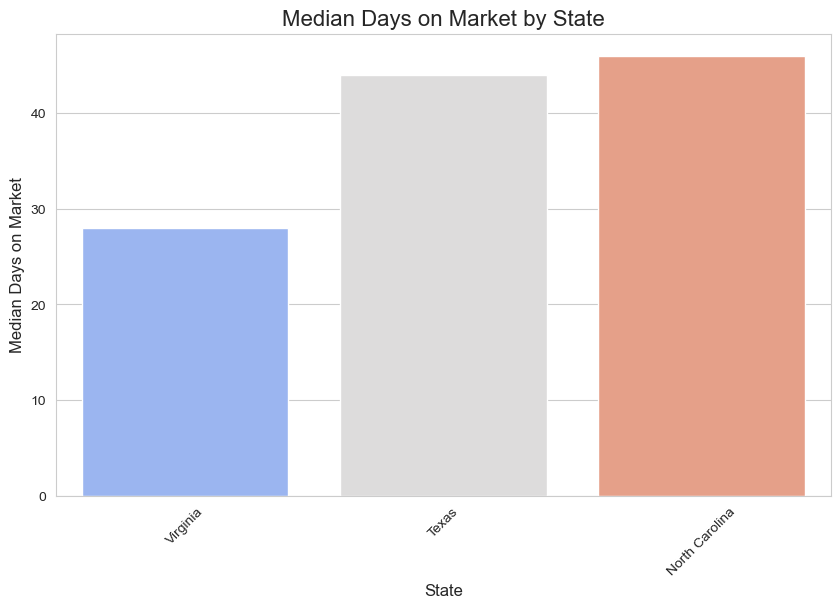

In [91]:
# Plotting the median DOM by state as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='median_dom', data=state_median_dom_sorted, palette='coolwarm')

# Add labels and title
plt.title('Median Days on Market by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


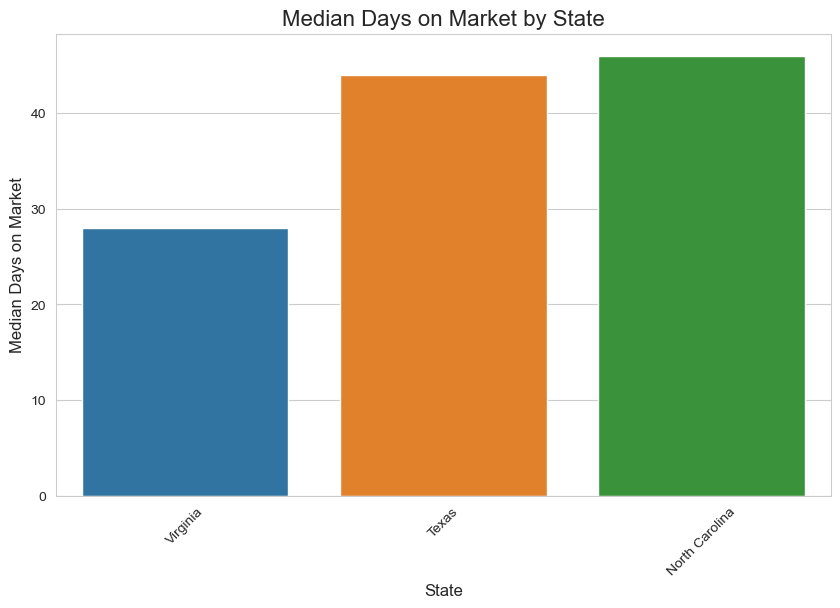

In [92]:
# Plotting the median DOM by state as a bar chart without using palette
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='median_dom', data=state_median_dom_sorted)

# Add labels and title
plt.title('Median Days on Market by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

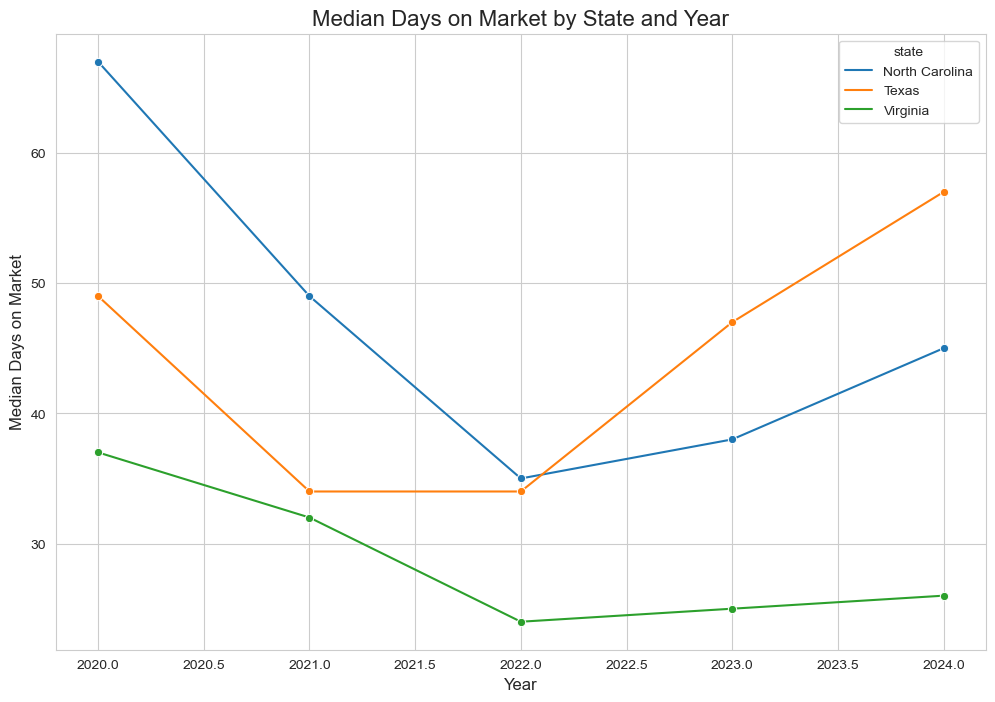

In [93]:
# Group by state and year to calculate the median of median_dom for each state per year
data['year'] = data['period_begin'].dt.year  # Extract the year from period_begin

state_year_median_dom = data.groupby(['state', 'year'])['median_dom'].median().reset_index()

# Plotting the median DOM by state and year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_dom', hue='state', data=state_year_median_dom, marker='o')

# Add labels and title
plt.title('Median Days on Market by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

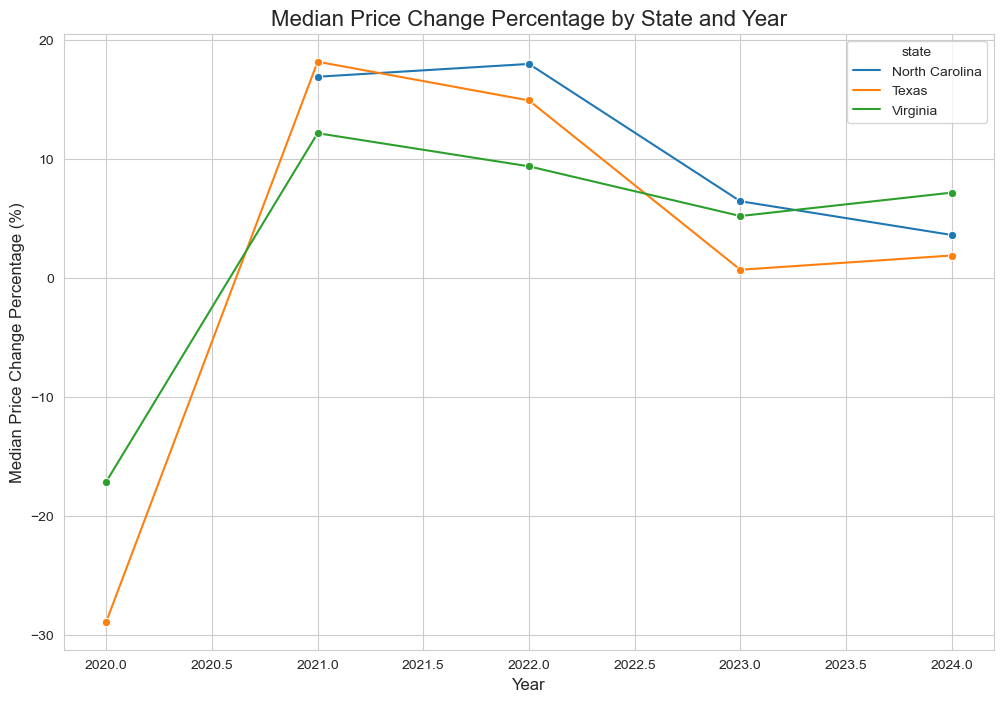

In [94]:
# Group by state and year to calculate the median of price_change_percentage for each state per year
data['year'] = data['period_begin'].dt.year  # Extract the year from period_begin

# Calculate price growth for each city and year
grouped_price = data.groupby(['city', 'state', 'year'])['median_sale_price'].median().reset_index()
grouped_price['price_growth'] = grouped_price.groupby('city')['median_sale_price'].pct_change() * 100

# Now group by state and year to calculate the median price change percentage for each state per year
state_year_price_growth = grouped_price.groupby(['state', 'year'])['price_growth'].median().reset_index()

# Plotting the median price growth by state and year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_growth', hue='state', data=state_year_price_growth, marker='o')

# Add labels and title
plt.title('Median Price Change Percentage by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Change Percentage (%)', fontsize=12)

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

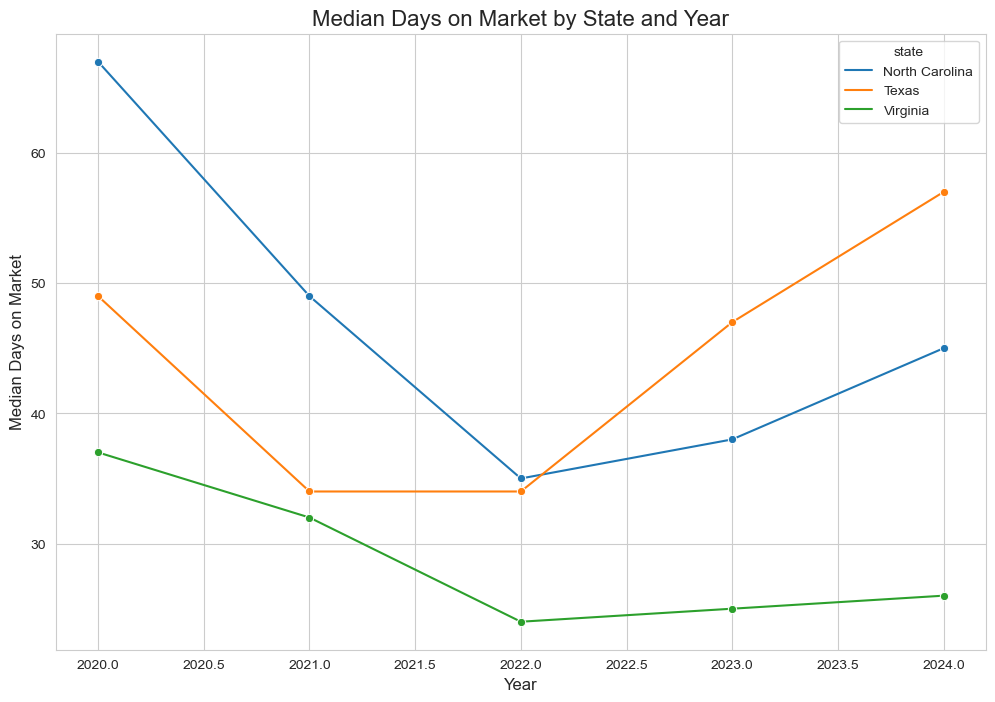

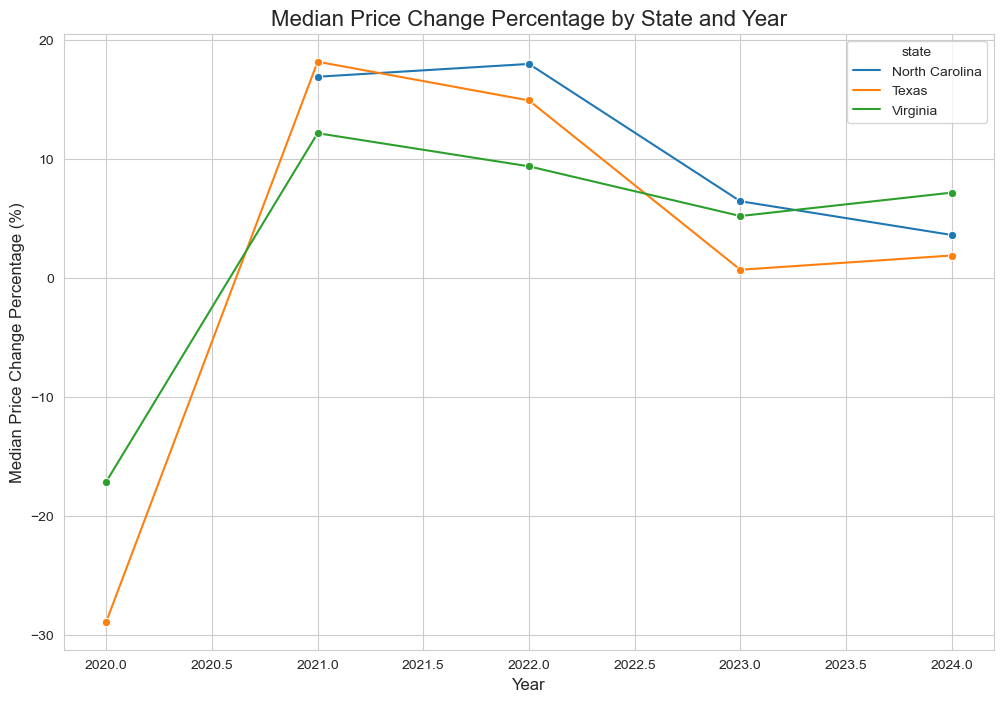

In [95]:
# Median DOM by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_dom', hue='state', data=state_year_median_dom, marker='o')
plt.title('Median Days on Market by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Save the plot as a PNG file
plt.savefig('median_dom_by_state_and_year.png', dpi=300)

# Price Change Percentage by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_growth', hue='state', data=state_year_price_growth, marker='o')
plt.title('Median Price Change Percentage by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Change Percentage (%)', fontsize=12)

# Save the plot as a PNG file
plt.savefig('price_change_percentage_by_state_and_year.png', dpi=300)

# Show the plots (optional)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

FileNotFoundError: [Errno 2] No such file or directory: '/Users/janlelie/Desktop/median_dom_by_state_and_year.png'

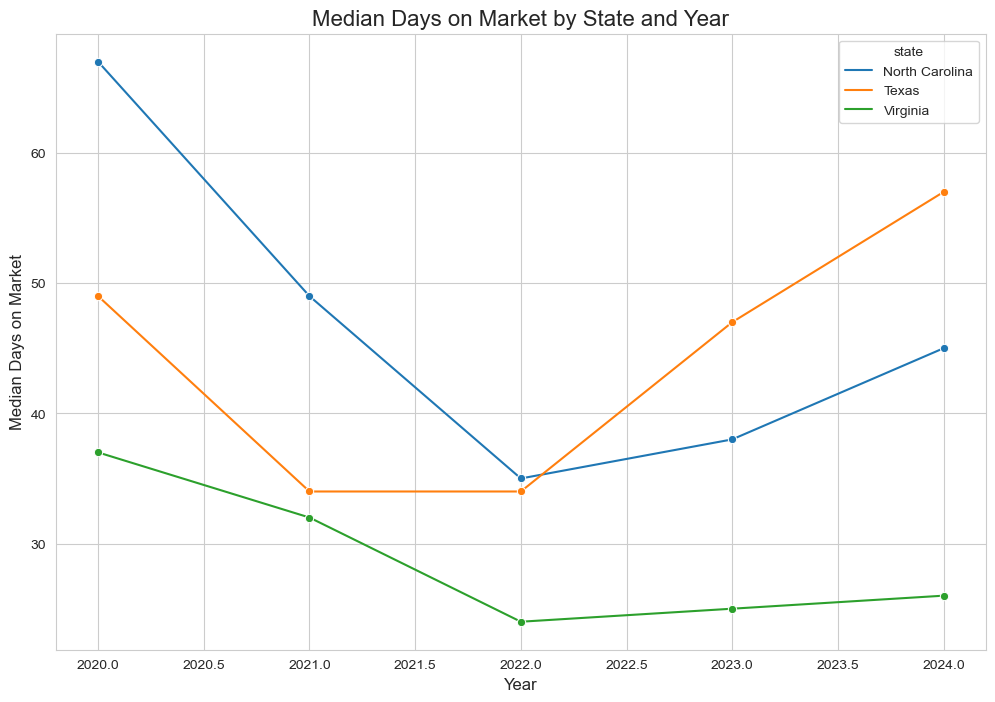

In [96]:
# Median DOM by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_dom', hue='state', data=state_year_median_dom, marker='o')
plt.title('Median Days on Market by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Save the plot as a PNG file to Desktop
plt.savefig('/Users/janlelie/Desktop/median_dom_by_state_and_year.png', dpi=300)

# Price Change Percentage by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_growth', hue='state', data=state_year_price_growth, marker='o')
plt.title('Median Price Change Percentage by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Change Percentage (%)', fontsize=12)

# Save the plot as a PNG file to Desktop
plt.savefig('/Users/janlelie/Desktop/price_change_percentage_by_state_and_year.png', dpi=300)

# Show the plots (optional)
plt.show()

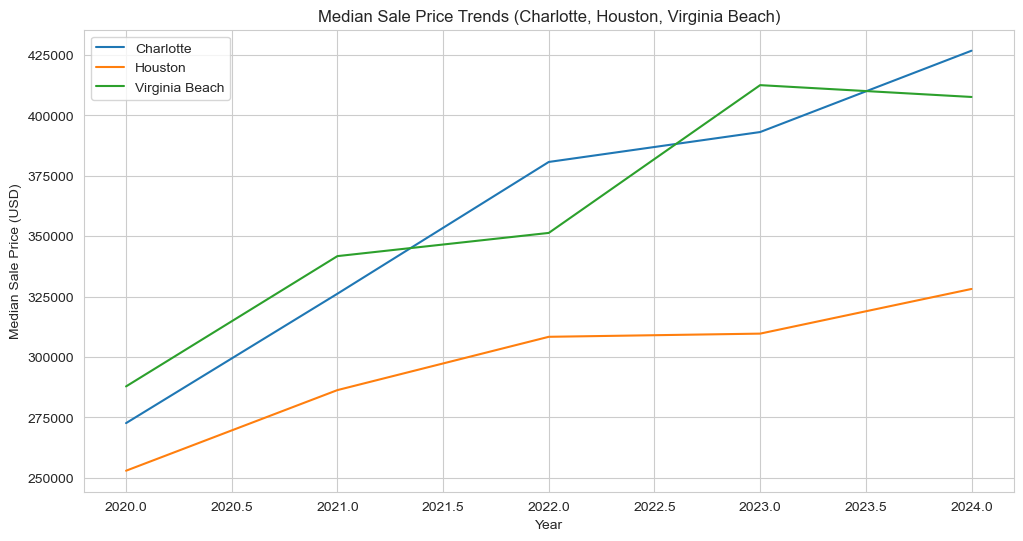

In [97]:
# 1. Median Sale Price Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_sale_price'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_sale_price'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_sale_price'], label='Virginia Beach')
plt.title('Median Sale Price Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Median Sale Price (USD)')
plt.legend()
plt.show()

#### Median Price per Square Foot Trends as a Line Chart (Charlotte, Houston, Virginia Beach)

##### Key Findings:

1. **Overall Price Growth Across All Cities**  
   - The median price per square foot has increased steadily from 2020 to 2024 in all three cities.

2. **Charlotte Market**  
   - Charlotte shows the highest increase in price per square foot.

3. **Virginia Beach Market**  
   - Virginia Beach has a very consistant upward trend that does not seem to be affected by the overall decrease in median price observed in the previous chart.

4. **Houston Market**  
   - Houston has shown an increase over the same time period like the other two markets however much like median price it is the most affordable of the three.

5. **Comparisons**  
   - Charlotte has the most increase of any market in cost per square foot.
   - Virginia Beach has followed a smilar trend to Charlotte but is slightly less expensive.
   - Houston is the most affordable market in terms of price per square foot.

### Conclusion:
All markets have increased over the same timeframe with Charlotte and Virginia Beach seeing similar increases while Huston has only shown moderate increases and is the market where you can get the most space for your money.


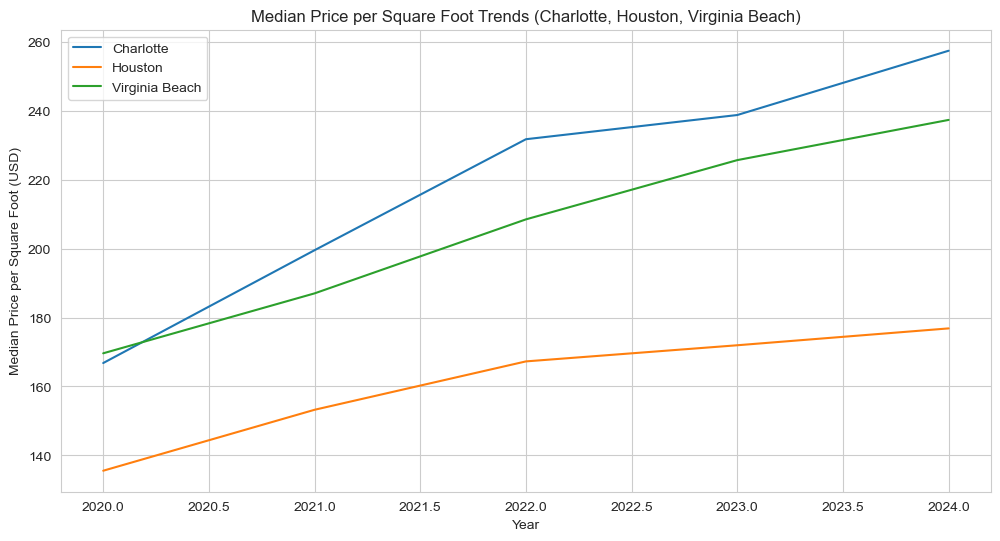

In [98]:
# 2. Median Price per Square Foot Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_ppsf'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_ppsf'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_ppsf'], label='Virginia Beach')
plt.title('Median Price per Square Foot Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Median Price per Square Foot (USD)')
plt.legend()
plt.show()

#### Inventory Trends as a Line Chart (Charlotte, Houston, Virginia Beach)

##### Key Findings:

1. **Charlotte’s Decline in Inventory**  
   - Charlotte shows a consistent decrease in inventory units likely playing a role in it having the highest median price as a result of supply and demand.

2. **Houston’s Steady Decline**  
   - Houston's inventory also declines over time, however it has the largest amount of inventory. This higher supply aligns with the lowest median price inverse to Charlotte.

3. **Virginia Beach’s Slow Decrease**  
   - Virginia Beach experiences the slowest rate of decline in inventory levels, but the lowest total inventory.

4. **Comparisons**  
   - Charlotte's inventory has the steepest decline, while Houston and Virginia Beach both experience moderate drops.  

### Conclusion:
Charlotte experiences the most significant inventory reduction, but all markets have had a decline in inventory over the observed timeframe.


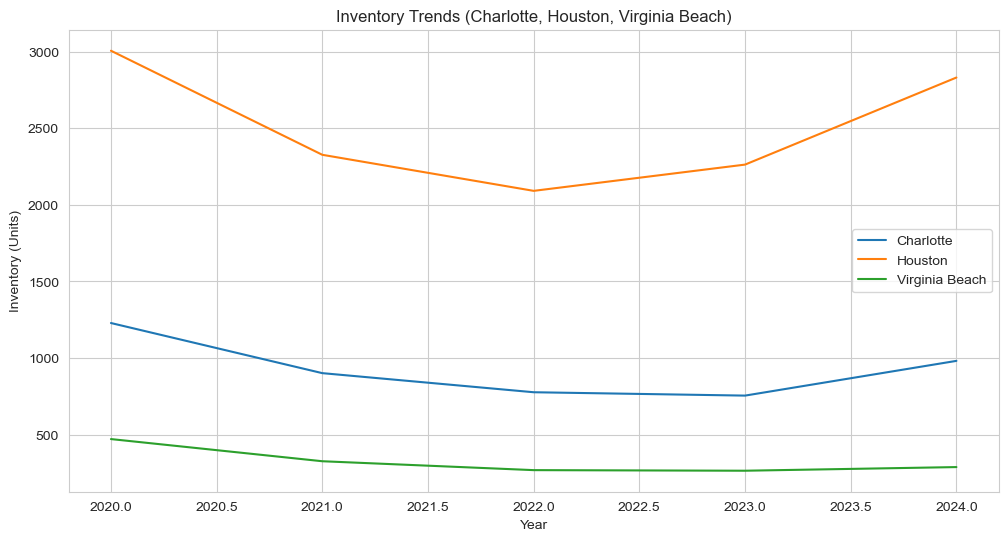

In [99]:
# 3. Inventory Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_inventory'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_inventory'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_inventory'], label='Virginia Beach')
plt.title('Inventory Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Inventory (Units)')
plt.legend()
plt.show()

#### Distribution of Median Price per Square Foot by City as a Box Plot

##### Key Findings:

1. **Charlotte Market**  
   - The distribution shows that Charlotte has the highest median price per square foot, with a mean of **218.84 USD**.
   - The interquartile range suggests variability, but prices still outpace the other markets analyzed.

2. **Houston Market**  
   - Houston has the lowest median price per square foot among the three cities, with a mean of **160.98 USD**.
   - The distribution is condensed, indicating lower variability in prices.

3. **Virginia Beach Market**  
   - Virginia Beach has a mean price per square foot of **205.62 USD**.
   - Its distribution falls inbetween the other two markets having more variation than Houston but less than Charlotte.

4. **Comparisons**  
   - Charlotte has the highest prices and the widest range, indicating some properties are likely to appreciate.
   - Houston remains the most affordable market with lower variation.
   - Virginia Beach shows a stable market with only some variability.

#### Conclusion:
Charlotte leads in price per square foot, followed by Virginia Beach, while Houston remains the most affordable.

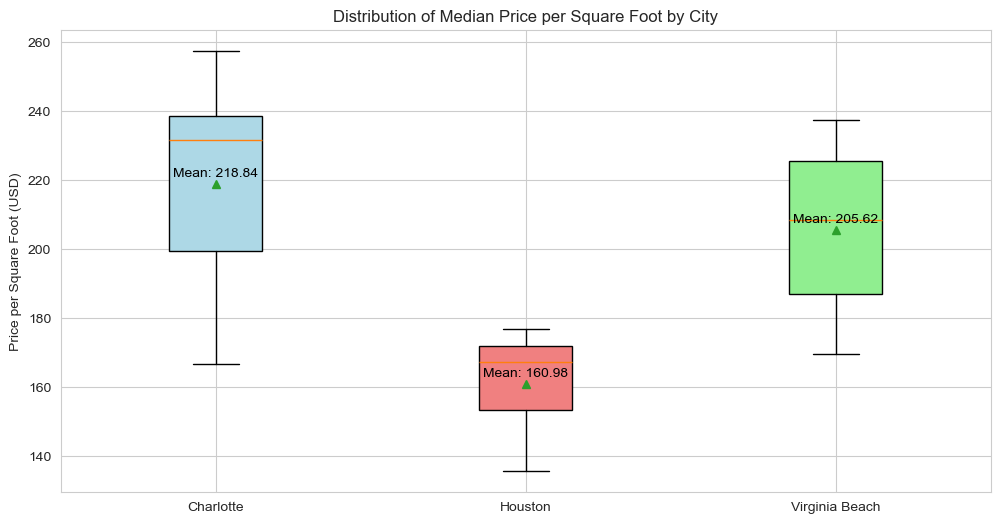

In [100]:
# Set Fig Size
plt.figure(figsize=(12, 6))

# Box Plot for Median Price per Square Foot by City
boxplot = plt.boxplot(
    [merged_city_data['charlotte_ppsf'].dropna(), merged_city_data['houston_ppsf'].dropna(), merged_city_data['virginia_beach_ppsf'].dropna()],
    labels=['Charlotte', 'Houston', 'Virginia Beach'],
    patch_artist=True,  # Enable custom colors
    showmeans=True  # Show the mean as a point
)

# Customizing colors
colors = ['lightblue', 'lightcoral', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Titles and labels
plt.title('Distribution of Median Price per Square Foot by City')
plt.ylabel('Price per Square Foot (USD)')

# Adding annotations for mean values
mean_values = [
    merged_city_data['charlotte_ppsf'].mean(),
    merged_city_data['houston_ppsf'].mean(),
    merged_city_data['virginia_beach_ppsf'].mean()
]

for i, mean in enumerate(mean_values, start=1):
    plt.text(i, mean + 2, f'Mean: {mean:.2f}', fontsize=10, color='black', ha='center')

plt.show()

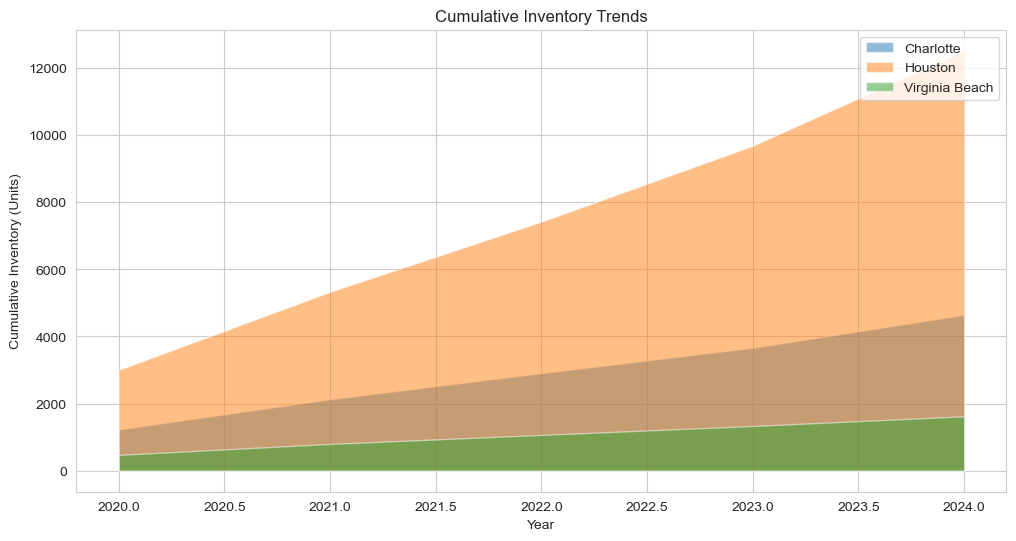

In [101]:
#cumulative area chart to show relative inventory growth/decline
plt.figure(figsize=(12, 6))
plt.fill_between(merged_city_data['year'], merged_city_data['charlotte_inventory'].cumsum(), alpha=0.5, label='Charlotte')
plt.fill_between(merged_city_data['year'], merged_city_data['houston_inventory'].cumsum(), alpha=0.5, label='Houston')
plt.fill_between(merged_city_data['year'], merged_city_data['virginia_beach_inventory'].cumsum(), alpha=0.5, label='Virginia Beach')
plt.title('Cumulative Inventory Trends')
plt.xlabel('Year')
plt.ylabel('Cumulative Inventory (Units)')
plt.legend()
plt.show()

#### Effect of Inventory on Median Sale Price as a Scatter Plot

##### Key Findings:

1. **Negative Correlation Between Inventory and Sale Price (Supply and Demand)**  
   - The trend lines indicate that as inventory levels increase, median sale prices decrease across all three cities.

2. **Charlotte Market**  
   - The trend for Charlotte shows a signifcant decline in median sale prices as inventory increases.
   - This suggests a supply-driven market where higher inventory results in lower pricing.

3. **Houston Market**  
   - Houston also shows a downward trend, but the relationship appears less steep than in Charlotte.
   - This indicates a more balanced supply-demand dynamic in Houston.

4. **Virginia Beach Market**  
   - Virginia Beach has the steepest decline in sale prices as inventory increases.
   - This suggests that the Virginia Beach market is highly sensitive to changes in inventory levels.

5. **Comparisons**  
   - Virginia Beach experiences the strongest price declines with increasing inventory, indicating high sensitivity to supply.
   - Houston's price drop is more gradual, implying a less volatile response to inventory changes.

#### Conclusion:
There is a clear inverse relationship between inventory levels and median sale prices across all three cities. This shows us that as supply decreases the buyers in the market will pay higher prices for properties due to higher competition for those properties. In other words its a sellers market.


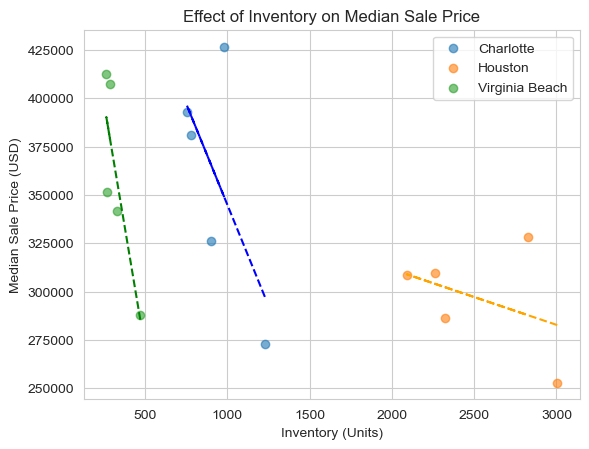

In [102]:
# Scatter plot for inventory vs. median sale price for each city
plt.scatter(merged_city_data['charlotte_inventory'], merged_city_data['charlotte_sale_price'], alpha=0.6, label='Charlotte')
plt.scatter(merged_city_data['houston_inventory'], merged_city_data['houston_sale_price'], alpha=0.6, label='Houston')
plt.scatter(merged_city_data['virginia_beach_inventory'], merged_city_data['virginia_beach_sale_price'], alpha=0.6, label='Virginia Beach')

# Add titles and labels
plt.title('Effect of Inventory on Median Sale Price')
plt.xlabel('Inventory (Units)')
plt.ylabel('Median Sale Price (USD)')
plt.legend()

# Optional: Add a trendline for each city
def add_trendline(x, y, color):
    z = np.polyfit(x, y, 1)  # Fit a linear trendline (degree=1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color)

add_trendline(merged_city_data['charlotte_inventory'], merged_city_data['charlotte_sale_price'], 'blue')
add_trendline(merged_city_data['houston_inventory'], merged_city_data['houston_sale_price'], 'orange')
add_trendline(merged_city_data['virginia_beach_inventory'], merged_city_data['virginia_beach_sale_price'], 'green')

plt.show()

In [103]:
covid_years_data = ten_years_data
print(covid_years_data.tail())

        period_begin period_end  period_duration region_type  region_type_id  \
5707969   2024-04-01 2024-04-30               30       place               6   
5707986   2015-11-01 2015-11-30               30       place               6   
5708033   2023-05-01 2023-05-31               30       place               6   
5708034   2024-04-01 2024-04-30               30       place               6   
5708039   2024-08-01 2024-08-31               30       place               6   

         table_id is_seasonally_adjusted                    region  \
5707969     23177                      f      Gloucester Point, VA   
5707986     16125                      f              Rockwall, TX   
5708033     13493                      f  North Richland Hills, TX   
5708034      9223                      f            Kure Beach, NC   
5708039     18307                      f            Weddington, NC   

                         city           state  ... sold_above_list_yoy  \
5707969      Gloucester 

In [104]:
# check number of rows 
num_rows = len(covid_years_data)
print(f"Number of Rows: {num_rows}")

Number of Rows: 457513


In [105]:
# Dropping columns that aren't essential for data analysis tbale
covid_years_data = pd.DataFrame(covid_years_data)
drop_columns = [
    'table_id',
    'is_seasonally_adjusted',
    'region_type',
    'region_type_id',
    'property_type',
    'region',
    'state_code',
    'last_updated',
    'period_duration'    
]
covid_years_data = covid_years_data.drop(columns=drop_columns)
print(covid_years_data.head())

   period_begin period_end           city     state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes     Texas                -1   
12   2024-05-01 2024-05-31    Krugerville     Texas                -1   
25   2024-07-01 2024-07-31          Alice     Texas                -1   
47   2021-04-01 2021-04-30          Alice     Texas                -1   
61   2016-06-01 2016-06-30   Pimmit Hills  Virginia                -1   

    median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
5             56000.0                    NaN                    NaN   
12           712000.0               0.514894               0.675373   
25           148000.0              -0.115494              -0.446729   
47           252000.0               1.913295               1.000000   
61           542500.0              -0.473301               0.029412   

    median_list_price  median_list_price_mom  ...  sold_above_list_mom  \
5            119900.0                    NaN  ...           

In [106]:
print(len(covid_years_data.columns))

49


In [107]:
# percentage of mmissing values in the data base:
missing_values = covid_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000437
median_sale_price_mom             16.463576
median_sale_price_yoy             17.630974
median_list_price                 14.202657
median_list_price_mom             26.067456
median_list_price_yoy             27.579107
median_ppsf                        0.772000
median_ppsf_mom                   17.203446
median_ppsf_yoy                   18.388767
median_list_ppsf                  14.598055
median_list_ppsf_mom              26.502635
median_list_ppsf_yoy              28.052973
homes_sold                         0.000000
homes_sold_mom                    16.463576
homes_sold_yoy                    17.630537
pending_sales                     10.987666
pending_sales_mom                 24.593837
pending_sales_yoy               

In [108]:
covid_years_data = covid_years_data.drop(columns=["median_sale_price_mom", "median_list_price_mom", "median_ppsf_mom", "median_list_ppsf_mom", "homes_sold_mom",\
                      "pending_sales_mom", "new_listings_mom", "inventory_mom", "months_of_supply_mom", "median_dom_mom",\
                      "avg_sale_to_list_mom", "sold_above_list_mom", "price_drops_mom", "off_market_in_two_weeks_mom"])
covid_years_data.head()

period_begin period_end           city     state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes     Texas                -1   
12   2024-05-01 2024-05-31    Krugerville     Texas                -1   
25   2024-07-01 2024-07-31          Alice     Texas                -1   
47   2021-04-01 2021-04-30          Alice     Texas                -1   
61   2016-06-01 2016-06-30   Pimmit Hills  Virginia                -1   

    median_sale_price  median_sale_price_yoy  median_list_price  \
5             56000.0                    NaN           119900.0   
12           712000.0               0.675373           675000.0   
25           148000.0              -0.446729           165000.0   
47           252000.0               1.000000           149000.0   
61           542500.0               0.029412           585000.0   

    median_list_price_yoy  median_ppsf  ...  avg_sale_to_list  \
5                     NaN    58.577406  ...          0.861538   
12               0.250232   232.662252  ...          0.995242   
25              -0.056873   103.496503  ...          0.926397   
47               0.027586   106.554703  ...          0.985631   
61               0.109110   354.575163  ...          1.039787   

    avg_sale_to_list_yoy  sold_above_list  sold_above_list_yoy  price_drops  \
5                    NaN         0.000000                  NaN     0.333333   
12             -0.005388         0.166667             0.023810     0.066667   
25             -0.099491         0.090909            -0.051948     0.105263   
47              0.059018         0.333333             0.333333          NaN   
61              0.014498         0.800000             0.000000     0.357143   

    price_drops_yoy  off_market_in_two_weeks  off_market_in_two_weeks_yoy  \
5               NaN                 0.000000                          NaN   
12        -0.361905                 0.500000                     0.333333   
25        -0.052632                 0.333333                     0.102564   
47              NaN                 0.312500                     0.312500   
61         0.119048                 0.500000                     0.100000   

    parent_metro_region  parent_metro_region_metro_code  
5           Houston, TX                           26420  
12           Dallas, TX                           19124  
25            Alice, TX                           10860  
47            Alice, TX                           10860  
61       Washington, DC                           47894  

[5 rows x 35 columns]

In [109]:
covid_years_data = covid_years_data.drop(columns=["median_sale_price_yoy", "median_list_price_yoy", "median_ppsf_yoy", "median_list_ppsf_yoy", "homes_sold_yoy",\
                      "pending_sales_yoy", "new_listings_yoy", "inventory_yoy", "months_of_supply_yoy", "median_dom_yoy",\
                      "avg_sale_to_list_yoy", "sold_above_list_yoy", "price_drops_yoy", "off_market_in_two_weeks_yoy"])
covid_years_data.head()

period_begin period_end           city     state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes     Texas                -1   
12   2024-05-01 2024-05-31    Krugerville     Texas                -1   
25   2024-07-01 2024-07-31          Alice     Texas                -1   
47   2021-04-01 2021-04-30          Alice     Texas                -1   
61   2016-06-01 2016-06-30   Pimmit Hills  Virginia                -1   

    median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
5             56000.0           119900.0    58.577406        178.422619   
12           712000.0           675000.0   232.662252        246.702890   
25           148000.0           165000.0   103.496503        107.415902   
47           252000.0           149000.0   106.554703         79.824561   
61           542500.0           585000.0   354.575163        315.618071   

    homes_sold  ...  new_listings  inventory  months_of_supply  median_dom  \
5          1.0  ...           1.0        3.0               3.0       102.0   
12         6.0  ...          11.0       15.0               2.5        45.0   
25        11.0  ...          17.0       57.0               5.2        64.0   
47         6.0  ...          15.0       27.0               4.5       102.0   
61         5.0  ...          16.0       28.0               5.6         5.0   

    avg_sale_to_list  sold_above_list  price_drops  off_market_in_two_weeks  \
5           0.861538         0.000000     0.333333                 0.000000   
12          0.995242         0.166667     0.066667                 0.500000   
25          0.926397         0.090909     0.105263                 0.333333   
47          0.985631         0.333333          NaN                 0.312500   
61          1.039787         0.800000     0.357143                 0.500000   

    parent_metro_region parent_metro_region_metro_code  
5           Houston, TX                          26420  
12           Dallas, TX                          19124  
25            Alice, TX                          10860  
47            Alice, TX                          10860  
61       Washington, DC                          47894  

[5 rows x 21 columns]

In [110]:
covid_years_data.head(10)

period_begin period_end                city           state  \
5     2024-04-01 2024-04-30       Holiday Lakes           Texas   
12    2024-05-01 2024-05-31         Krugerville           Texas   
25    2024-07-01 2024-07-31               Alice           Texas   
47    2021-04-01 2021-04-30               Alice           Texas   
61    2016-06-01 2016-06-30        Pimmit Hills        Virginia   
83    2022-11-01 2022-11-30             Watauga           Texas   
93    2017-01-01 2017-01-31  Wrightsville Beach  North Carolina   
111   2015-03-01 2015-03-31          New Berlin           Texas   
130   2024-07-01 2024-07-31    Boswell's Corner        Virginia   
133   2020-02-01 2020-02-29      Carolina Beach  North Carolina   

     property_type_id  median_sale_price  median_list_price  median_ppsf  \
5                  -1            56000.0           119900.0    58.577406   
12                 -1           712000.0           675000.0   232.662252   
25                 -1           148000.0           165000.0   103.496503   
47                 -1           252000.0           149000.0   106.554703   
61                 -1           542500.0           585000.0   354.575163   
83                 -1           284000.0           299900.0   199.408470   
93                 13           775000.0                NaN   420.281996   
111                 6           383200.0                NaN   183.524904   
130                -1           343500.0                NaN   171.848706   
133                 6           400000.0           392000.0   209.314495   

     median_list_ppsf  homes_sold  ...  new_listings  inventory  \
5          178.422619         1.0  ...           1.0        3.0   
12         246.702890         6.0  ...          11.0       15.0   
25         107.415902        11.0  ...          17.0       57.0   
47          79.824561         6.0  ...          15.0       27.0   
61         315.618071         5.0  ...          16.0       28.0   
83         188.335358        18.0  ...          19.0       33.0   
93                NaN         3.0  ...           NaN        4.0   
111               NaN         1.0  ...           NaN        NaN   
130               NaN         2.0  ...           NaN        NaN   
133        280.095699         7.0  ...          12.0       54.0   

     months_of_supply  median_dom  avg_sale_to_list  sold_above_list  \
5                 3.0       102.0          0.861538         0.000000   
12                2.5        45.0          0.995242         0.166667   
25                5.2        64.0          0.926397         0.090909   
47                4.5       102.0          0.985631         0.333333   
61                5.6         5.0          1.039787         0.800000   
83                1.8        39.0          0.984357         0.222222   
93                1.3        97.0          0.945144         0.000000   
111               NaN       193.0          0.988903         0.000000   
130               NaN        36.0          1.011111         0.500000   
133               7.7        81.0          0.954115         0.000000   

     price_drops  off_market_in_two_weeks  parent_metro_region  \
5       0.333333                 0.000000          Houston, TX   
12      0.066667                 0.500000           Dallas, TX   
25      0.105263                 0.333333            Alice, TX   
47           NaN                 0.312500            Alice, TX   
61      0.357143                 0.500000       Washington, DC   
83      0.393939                 0.272727       Fort Worth, TX   
93           NaN                 0.000000       Wilmington, NC   
111          NaN                      NaN      San Antonio, TX   
130          NaN                      NaN       Washington, DC   
133          NaN                 0.000000       Wilmington, NC   

    parent_metro_region_metro_code  
5                            26420  
12                           19124  
25                           10860  
47                     

In [111]:
# percentage of mmissing values in the data base:
missing_values = covid_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000437
median_list_price                 14.202657
median_ppsf                        0.772000
median_list_ppsf                  14.598055
homes_sold                         0.000000
pending_sales                     10.987666
new_listings                      14.184734
inventory                          5.873931
months_of_supply                   5.873931
median_dom                         0.734187
avg_sale_to_list                   8.584456
sold_above_list                    0.000000
price_drops                       41.474887
off_market_in_two_weeks            7.396948
parent_metro_region                0.000000
parent_metro_region_metro_code     0.000000
dtype: float64

In [112]:
# drop columns where more than 30% of values are missing 
threshold = 0.3
covid_years_data = covid_years_data.dropna(axis=1, thresh=len(covid_years_data) * (1 - threshold))
print(covid_years_data.shape)

(457513, 20)


In [113]:
covid_years_data.head()

period_begin period_end           city     state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes     Texas                -1   
12   2024-05-01 2024-05-31    Krugerville     Texas                -1   
25   2024-07-01 2024-07-31          Alice     Texas                -1   
47   2021-04-01 2021-04-30          Alice     Texas                -1   
61   2016-06-01 2016-06-30   Pimmit Hills  Virginia                -1   

    median_sale_price  median_list_price  median_ppsf  median_list_ppsf  \
5             56000.0           119900.0    58.577406        178.422619   
12           712000.0           675000.0   232.662252        246.702890   
25           148000.0           165000.0   103.496503        107.415902   
47           252000.0           149000.0   106.554703         79.824561   
61           542500.0           585000.0   354.575163        315.618071   

    homes_sold  pending_sales  new_listings  inventory  months_of_supply  \
5          1.0            1.0           1.0        3.0               3.0   
12         6.0            6.0          11.0       15.0               2.5   
25        11.0            9.0          17.0       57.0               5.2   
47         6.0           16.0          15.0       27.0               4.5   
61         5.0            8.0          16.0       28.0               5.6   

    median_dom  avg_sale_to_list  sold_above_list  off_market_in_two_weeks  \
5        102.0          0.861538         0.000000                 0.000000   
12        45.0          0.995242         0.166667                 0.500000   
25        64.0          0.926397         0.090909                 0.333333   
47       102.0          0.985631         0.333333                 0.312500   
61         5.0          1.039787         0.800000                 0.500000   

   parent_metro_region  parent_metro_region_metro_code  
5          Houston, TX                           26420  
12          Dallas, TX                           19124  
25           Alice, TX                           10860  
47           Alice, TX                           10860  
61      Washington, DC                           47894

In [114]:
# Select relevant columns (adjust column names as needed)
price_column = 'median_sale_price'  # Adjust if necessary
region_column = 'parent_metro_region'  # Adjust if necessary

In [115]:
# Ensure we have the required columns
if price_column in covid_years_data.columns and region_column in covid_years_data.columns:
    # Calculate the price growth for each city
    price_growth = covid_years_data.groupby(region_column)[price_column].agg(['first', 'last'])
    price_growth['growth_percent'] = ((price_growth['last'] - price_growth['first']) / price_growth['first']) * 100

    # Sort by highest growth
    fastest_growing_cities = price_growth.sort_values(by='growth_percent', ascending=False)
    # Display the top 10 fastest-growing cities
    print(fastest_growing_cities.head(10))
else:
    print("Error: Required columns not found in the dataset. Check column names.")

                        first       last  growth_percent
parent_metro_region                                     
Rocky Mount, NC       10000.0   184000.0     1740.000000
New Bern, NC          27000.0   230000.0      751.851852
Gainesville, TX       64999.0   517625.0      696.358406
Odessa, TX            37000.0   269300.0      627.837838
Charlotte, NC        145500.0   998750.0      586.426117
Houston, TX           56000.0   380000.0      578.571429
Granbury, TX         274900.0  1650000.0      500.218261
Big Stone Gap, VA     16196.0    91450.0      464.645592
Kingsville, TX        25000.0   131575.0      426.300000
Boone, NC            165500.0   750000.0      353.172205


In [116]:
# Select the top 10 fastest-growing cities
top_cities = fastest_growing_cities.head(10)

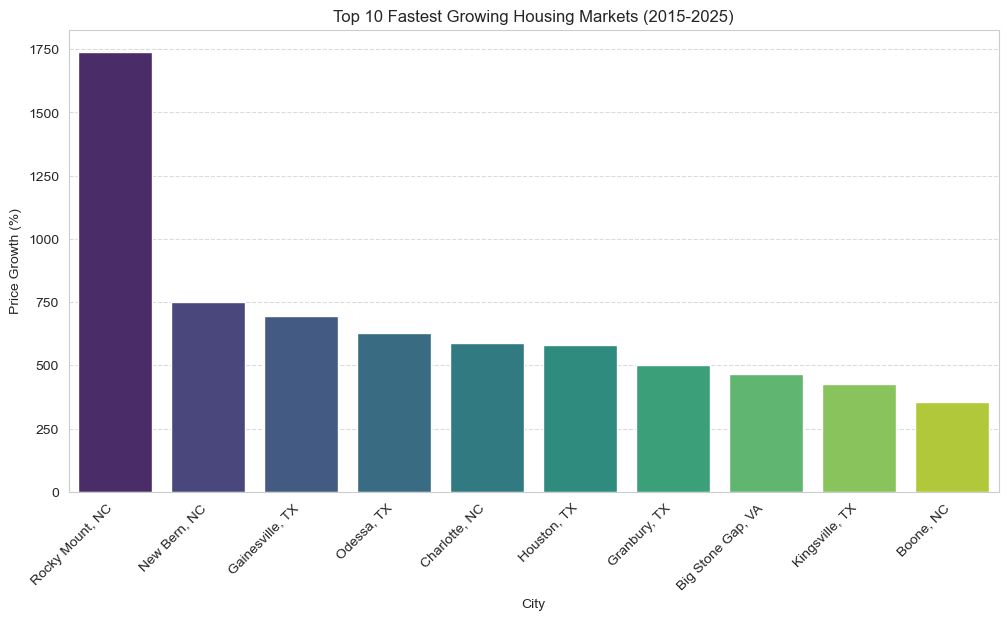

In [117]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_cities.index, 
    y=top_cities['growth_percent'], 
    palette="viridis"
)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Price Growth (%)")
plt.title("Top 10 Fastest Growing Housing Markets (2015-2025)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [118]:
# Extract year from period_begin
covid_years_data['year'] = covid_years_data['period_begin'].dt.year

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

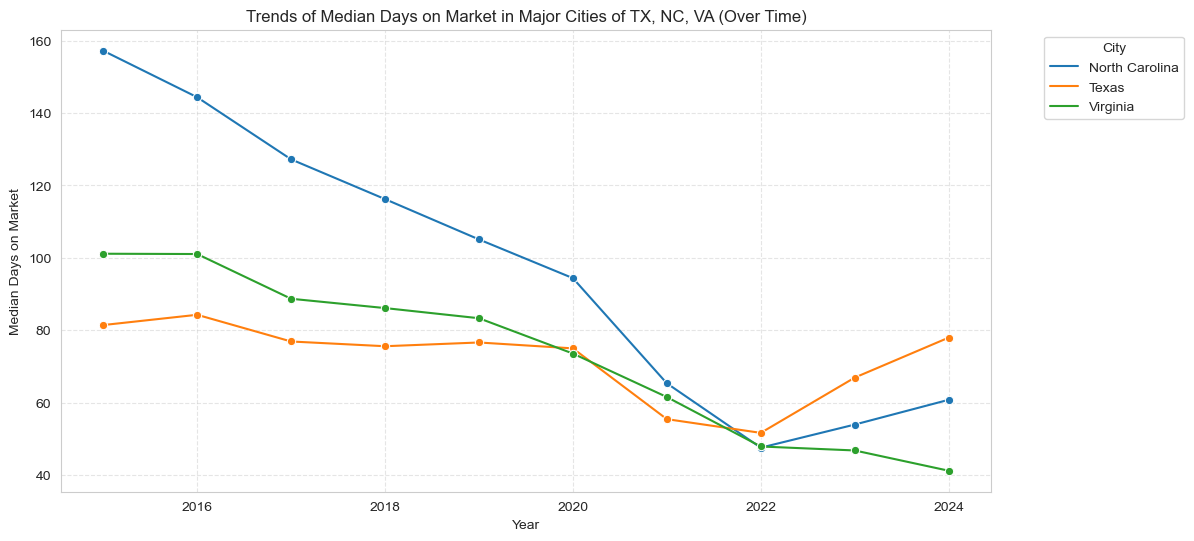

In [119]:
# Check if 'median_dom' and 'region_name' columns exist
if 'median_dom' in covid_years_data.columns and 'state' in ten_years_data.columns:
    
    # Group by year and city, then calculate average Median_DOM
    df_grouped = covid_years_data.groupby(['year', 'state'])['median_dom'].mean().reset_index()

    # Select major cities (top 5 per state by lowest Median_DOM)
    major_cities = df_grouped.groupby('state')['median_dom'].mean().nsmallest(15).index
    df_major_cities = df_grouped[df_grouped['state'].isin(major_cities)]

    # Plot the trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_major_cities, 
        x='year', 
        y='median_dom', 
        hue='state', 
        marker='o', 
        palette='tab10'
    )

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Median Days on Market")
    plt.title("Trends of Median Days on Market in Major Cities of TX, NC, VA (Over Time)")
    plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

else:
    print("Error: 'median_dom' or 'region_name' column not found in the dataset. Check column names.")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


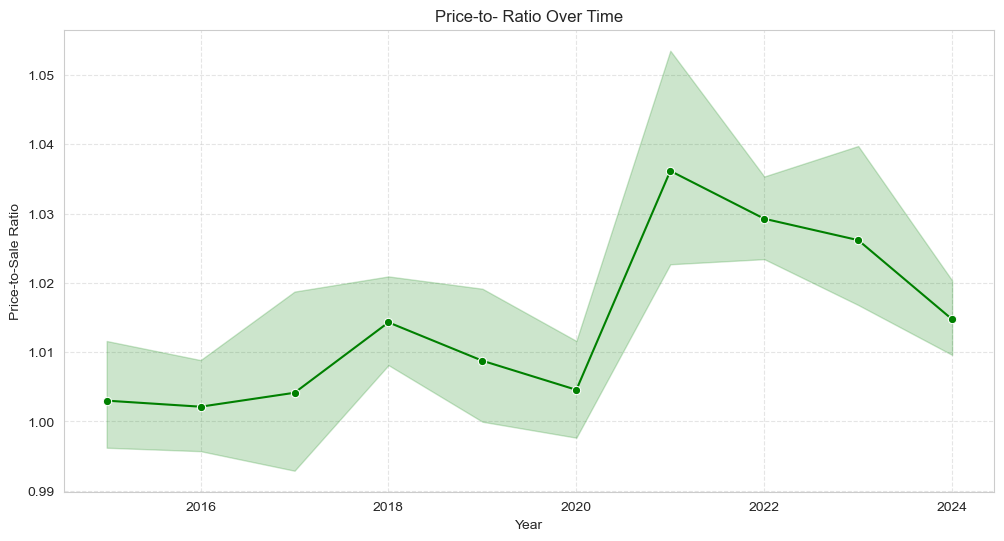

In [120]:
# Question 6 Seaborn use
# Ensure necessary columns exist
if 'median_list_price' in covid_years_data.columns and 'median_sale_price' in covid_years_data.columns:
    
    # Calculate Price-to-sale Ratio (are houses going for more or less than they list for)
    covid_years_data['price_to_sale_ratio'] = covid_years_data['median_sale_price'] / (covid_years_data['median_list_price'])

    # Group by year and compute the average Price-to-Rent Ratio
    df_grouped = covid_years_data.groupby('year')[['median_sale_price', 'price_to_sale_ratio']].mean().reset_index()


    # Display Price-to-Rent Ratio trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data= covid_years_data, x='year', y='price_to_sale_ratio', marker='o', color='green')

    plt.xlabel("Year")
    plt.ylabel("Price-to-Sale Ratio")
    plt.title("Price-to- Ratio Over Time")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

else:
    print("Error: Required columns ('median_sale_price' or 'median_rent_price') not found in the dataset. Check column names.")

In [121]:
covid_years_data = covid_years_data.drop(columns=["off_market_in_two_weeks","months_of_supply"])

In [122]:
from pprint import pprint

#pprint(covid_years_data)
CovidData = covid_years_data.to_dict('records')


In [123]:
### MONGODB LOAD
from pymongo import MongoClient

#make instance of mongo client 
mongo = MongoClient(port=27017)

ModuleNotFoundError: No module named 'pymongo'

In [ ]:
db = mongo.HousingMarketProject

In [ ]:
CovidDataCollection= db.CovidDataCollection
CovidDataCollection.insert_many(CovidData)